### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/[2023-2024] AN2DL/Lecture 2

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/[2023-2024] AN2DL/Lecture 2


### Import libraries

In [2]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [3]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.13.0


In [4]:
# Import other libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', size=16)
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

### Load data

In [5]:
# Read a CSV file into a DataFrame called 'wine' with ';' as the separator
wine = pd.read_csv('/gdrive/My Drive/[2023-2024] AN2DL/Lecture 2/winequality.csv', sep=';')
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  colour                6497 non-null   int64  
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None


### Inspect data

In [6]:
# Display the first 10 rows of the wine dataset
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,colour,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1,5


In [7]:
# Generate summary statistics for the wine dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,colour,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994669,3.218501,0.531268,10.491759,0.246114,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002898,0.160787,0.148806,1.192711,0.430779,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.000000,4.010000,2.000000,14.900000,1.000000,9.000000


In [8]:
# Find unique values and their counts in the 'quality' column of the 'wine' DataFrame
unique, count = np.unique(wine['quality'], return_counts=True)

# Print unique values and their corresponding sample counts
print('Target labels:',unique)
for i,u in enumerate(unique):
    print(f'Quality {unique[i]} has {count[i]} samples')

Target labels: [3 4 5 6 7 8 9]
Quality 3 has 30 samples
Quality 4 has 216 samples
Quality 5 has 2138 samples
Quality 6 has 2836 samples
Quality 7 has 1079 samples
Quality 8 has 193 samples
Quality 9 has 5 samples


#### Split in train, validation and test

In [9]:
# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    wine[wine.columns[:-1]],
    pd.DataFrame(wine['quality'], columns=['quality']),
    test_size = 0.1,
    random_state=seed,
    stratify=pd.DataFrame(wine['quality'], columns=['quality'])
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = len(X_test), # Ensure validation set size matches test set size
    random_state=seed,
    stratify=y_train_val
)

# Print the shapes of the resulting datasets
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(5197, 12) (5197, 1)
(650, 12) (650, 1)
(650, 12) (650, 1)


### Process data

In [10]:
# Compute and store the maximum values for each feature in the training dataset
max_df = X_train.max()
print('Wine dataset maximum valus')
print(max_df)

# Compute and store the minimum values for each feature in the training dataset
min_df = X_train.min()
print('\nWine dataset minimum valus')
print(min_df)

Wine dataset maximum valus
fixed acidity            15.900
volatile acidity          1.580
citric acid               1.230
residual sugar           65.800
chlorides                 0.611
free sulfur dioxide     289.000
total sulfur dioxide    440.000
density                   1.000
pH                        4.010
sulphates                 2.000
alcohol                  14.900
colour                    1.000
dtype: float64

Wine dataset minimum valus
fixed acidity           3.90000
volatile acidity        0.08000
citric acid             0.00000
residual sugar          0.60000
chlorides               0.00900
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.98711
pH                      2.72000
sulphates               0.23000
alcohol                 8.00000
colour                  0.00000
dtype: float64


In [11]:
# Normalise the dataset splits in the range [0,1]
X_train_val = (X_train_val - min_df) / (max_df - min_df)
X_train = (X_train - min_df)/(max_df - min_df)
X_val = (X_val - min_df)/(max_df - min_df)
X_test = (X_test - min_df)/(max_df - min_df)

In [12]:
# Inspect the effects of data normalisation
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,colour
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,0.276814,0.173504,0.258030,0.074757,0.077916,0.103038,0.254166,0.588607,0.386002,0.169974,0.358461,0.246104
std,0.106641,0.111079,0.116518,0.073302,0.057342,0.061650,0.130845,0.224261,0.124649,0.082751,0.171479,0.430781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.208333,0.100000,0.203252,0.018405,0.048173,0.055556,0.165899,0.410396,0.302326,0.112994,0.217391,0.000000
50%,0.258333,0.140000,0.252033,0.036810,0.063123,0.097222,0.260369,0.607448,0.379845,0.158192,0.333333,0.000000
75%,0.316667,0.220000,0.317073,0.115031,0.093023,0.142361,0.345622,0.767261,0.465116,0.209040,0.478261,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Compute and store the maximum values for the training dataset labels
max_y = y_train.max()
print('Wine dataset labels maximum valus')
print(max_y)

# Compute and store the minimum values for the training dataset labels
min_y = y_train.min()
print('\nWine dataset labels minimum valus')
print(min_y)

Wine dataset labels maximum valus
quality    9
dtype: int64

Wine dataset labels minimum valus
quality    3
dtype: int64


In [14]:
# Normalise (also) the dataset labels splits in the range [0,1]
y_train_val = (y_train_val - min_y) / (max_y - min_y)
y_train = (y_train - min_y)/(max_y - min_y)
y_val = (y_val - min_y)/(max_y - min_y)
y_test = (y_test - min_y)/(max_y - min_y)

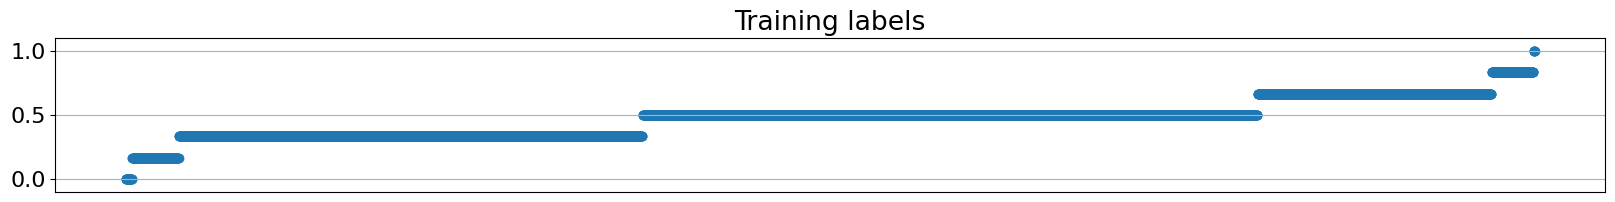

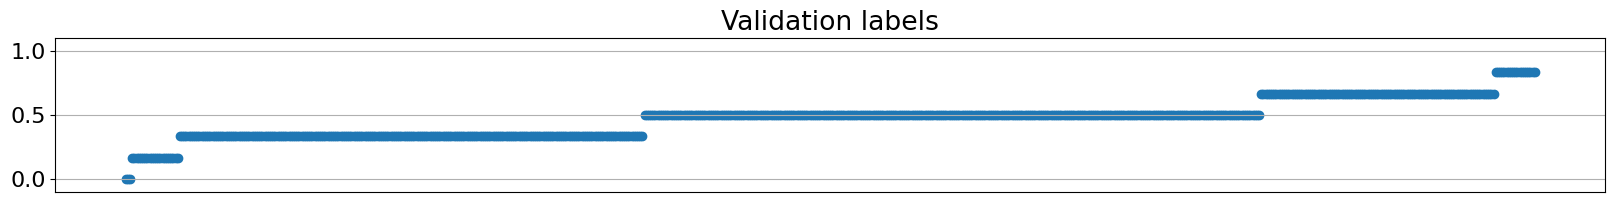

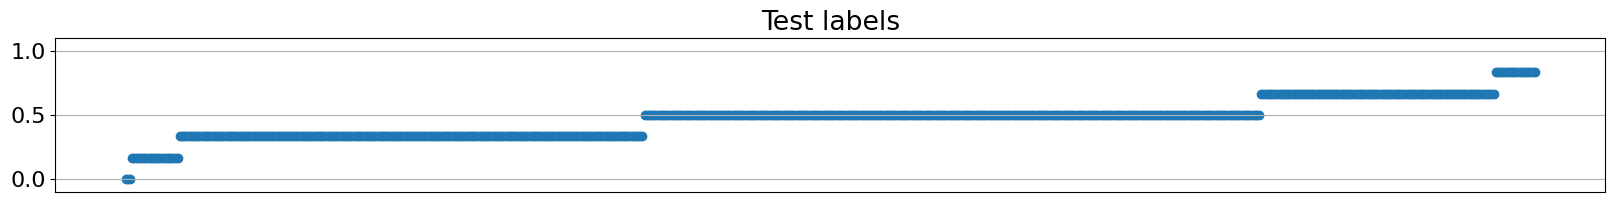

In [15]:
# Create three separate subplots to visualize the sorted target variable values for the training, validation, and test sets

# Create a figure for the training labels subplot
plt.figure(figsize=(20, 2))
plt.scatter(np.arange(len(y_train)), np.sort(y_train, axis=0))
plt.title('Training labels')
plt.xticks([])  # Remove x-axis ticks
plt.grid(0.2)   # Add a grid with opacity 0.2 for reference
plt.ylim([-0.1, 1.1])  # Set the y-axis limits to [0.1, 1.1]

# Create a figure for the validation labels subplot
plt.figure(figsize=(20, 2))
plt.scatter(np.arange(len(y_val)), np.sort(y_val, axis=0))
plt.title('Validation labels')
plt.xticks([])  # Remove x-axis ticks
plt.grid(0.2)   # Add a grid with opacity 0.2 for reference
plt.ylim([-0.1, 1.1])  # Set the y-axis limits to [0.1, 1.1]

# Create a figure for the test labels subplot
plt.figure(figsize=(20, 2))
plt.scatter(np.arange(len(y_test)), np.sort(y_test, axis=0))
plt.title('Test labels')
plt.xticks([])  # Remove x-axis ticks
plt.grid(0.2)   # Add a grid with opacity 0.2 for reference
plt.ylim([-0.1, 1.1])  # Set the y-axis limits to [0.1, 1.1]

# Display the plots
plt.show()

In [16]:
# Define the input shape for the neural network, excluding the batch size
input_shape = X_train.shape[1:]

# Define the batch size for training
batch_size = 64

# Define the number of training epochs
epochs = 2000

# Create an empty dictionary to store metadata
metadata = {}

### Auxiliary functions

In [17]:
# Define a function for plotting training and validation Mean Squared Error (MSE) histories.
def plot_histories(metadata, training=False, baseline=False, show_all=False):

    print('VALIDATION MSE')
    plt.figure(figsize=(21, 9))

    # Iterate through different models stored in metadata.
    for model in list(metadata.keys()):

        # Skip the baseline model if baseline flag is False.
        if model == 'Baseline' and not baseline:
            continue

        # Retrieve relevant information from the metadata dictionary.
        history = metadata[model]['history']
        patience = metadata[model]['patience']
        color = metadata[model]['color']
        val_score = metadata[model]['val_score']
        print('%s: %.4f' % (model, val_score))

        # Plot training and validation MSE histories with or without patience handling.
        if patience != 0:
            if training:
                plt.plot(
                    history['mse'][:-patience],
                    alpha=0.5,
                    color=color
                )
                if show_all:
                    plt.plot(
                        np.arange(len(history['mse']) - patience - 1, len(history['mse'])),
                        history['mse'][-patience - 1:],
                        alpha=0.2,
                        color=color
                    )

            plt.plot(
                history['val_mse'][:-patience],
                label=model,
                alpha=0.9,
                color=color
            )
            if show_all:
                plt.plot(
                    np.arange(len(history['val_mse']) - patience - 1, len(history['val_mse'])),
                    history['val_mse'][-patience - 1:],
                    alpha=0.2,
                    color=color
                )

        else:
            if training:
                plt.plot(
                    history['mse'],
                    alpha=0.5,
                    color=color
                )
            plt.plot(
                history['val_mse'],
                label=model,
                alpha=0.9,
                color=color
            )

        # Set y-axis limits and add labels, legends, and grid.
        if training:
            plt.ylim(0.004, 0.0225)
        else:
            plt.ylim(0.01, 0.025)
        plt.title('Mean Squared Error')
        plt.legend(loc='upper right')
        plt.grid(alpha=0.3)

    # Display the plot.
    plt.show()

In [18]:
# Define a function for plotting residuals and model predictions
def plot_residuals(model, data, labels):
    # Sort the data and labels based on the 'labels' column
    data['sort'] = labels
    data = data.sort_values(by=['sort'])
    labels = np.expand_dims(data['sort'], 1)
    data.drop(['sort'], axis=1, inplace=True)

    # Make predictions using the model
    y_pred = model.predict(data, verbose=0)

    # Calculate squared errors and mean squared error (MSE)
    squared_errors = (labels - y_pred)**2
    mse = np.mean(squared_errors).astype('float32')
    print('MSE: %.4f' % mse)

    # Set up plotting styles and create a scatter plot
    mpl.rcParams.update(mpl.rcParamsDefault)
    sns.set(font_scale=1.1, style=None, palette='Set1')
    plt.figure(figsize=(21, 5))

    # Plot true labels in red and model predictions in blue
    plt.scatter(np.arange(len(labels)), labels, label='True', color='#d62728', alpha=0.7, s=8)

    # Add vertical lines to represent residuals
    for i in range(len(labels)):
        if labels[i] >= y_pred[i]:
            plt.vlines(i, y_pred[i], labels[i], alpha=0.2, linewidth=0.5)
        else:
            plt.vlines(i, labels[i], y_pred[i], alpha=0.2, linewidth=0.5)

    plt.scatter(np.arange(len(y_pred)), y_pred, label='Prediction', color='#1f77b4', s=8)

    # Add legends, grid, and set y-axis limits
    plt.legend()
    plt.grid(alpha=0.3)
    plt.ylim((-0.1, 1.1))
    plt.show()

## Baseline

### Build the model

In [19]:
def build_baseline_model(input_shape, learning_rate=1e-3, seed=seed):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    x = tfkl.Dense(units=256, kernel_initializer=tfk.initializers.HeUniform(seed=seed), name='HiddenDense1')(input_layer)
    x = tfkl.Activation('relu', name='HiddenActivation1')(x)
    x = tfkl.Dense(units=256, kernel_initializer=tfk.initializers.HeUniform(seed=seed), name='HiddenDense2')(x)
    x = tfkl.Activation('relu', name='HiddenActivation2')(x)
    output_layer = tfkl.Dense(units=1, kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),name='Output')(x)
    output_activation = tfkl.Activation('linear', name='OutputActivation')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='baseline_model')

    # Compile the model
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 HiddenDense1 (Dense)        (None, 256)               3328      
                                                                 
 HiddenActivation1 (Activat  (None, 256)               0         
 ion)                                                            
                                                                 
 HiddenDense2 (Dense)        (None, 256)               65792     
                                                                 
 HiddenActivation2 (Activat  (None, 256)               0         
 ion)                                                            
                                                                 
 Output (Dense)              (None, 1)              

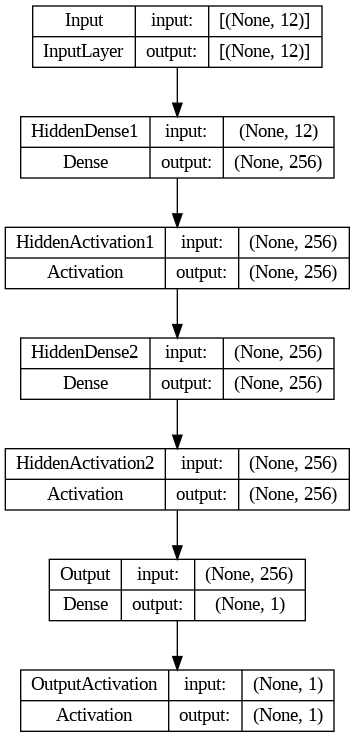

In [20]:
model = build_baseline_model(input_shape)
model.summary()
tfk.utils.plot_model(model, show_shapes=True, expand_nested=True)

### Train the model

In [21]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/2000
82/82 [==============================] - 4s 21ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2/2000
82/82 [==============================] - 1s 12ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 3/2000
82/82 [==============================] - 1s 12ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 4/2000
82/82 [==============================] - 1s 13ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 5/2000
82/82 [==============================] - 1s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 6/2000
82/82 [==============================] - 1s 8ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 7/2000
82/82 [==============================] - 1s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 8/2000
82/82 [==============================] - 1s 11ms/step - los

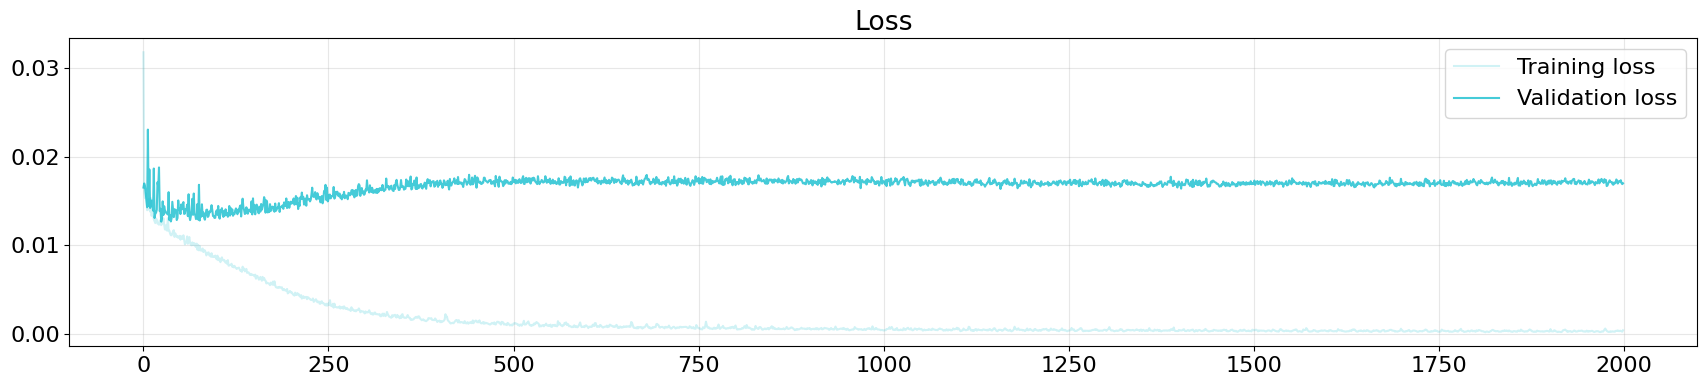

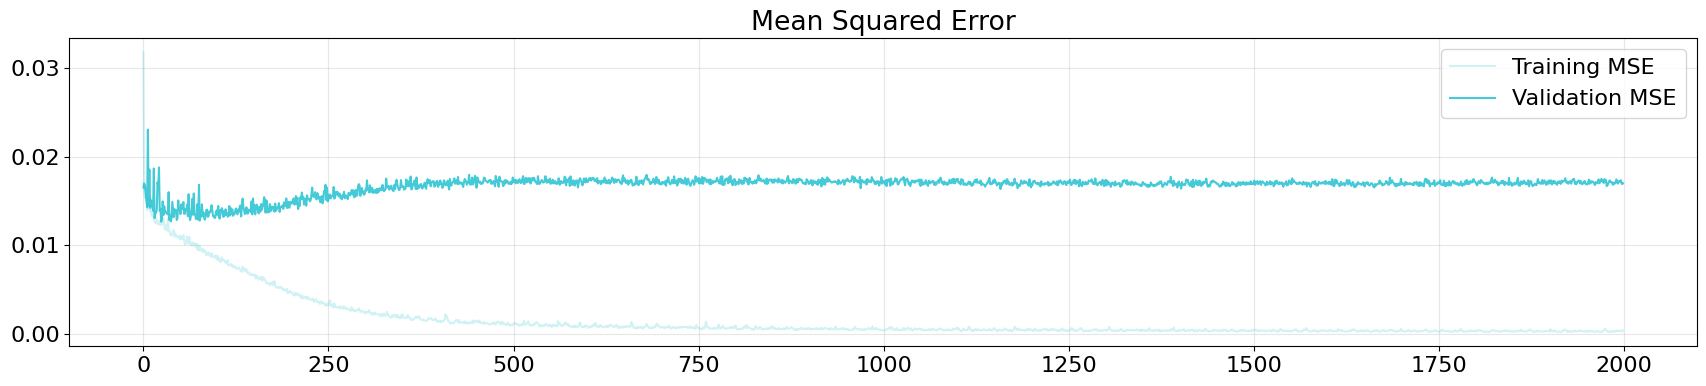

In [22]:
# Set the number of initial data points to ignore
ignore = 0

# Create a figure for loss visualization
plt.figure(figsize=(21, 4))

# Plot training and validation loss
plt.plot(history['loss'][ignore:], label='Training loss', alpha=.2, color='#17becf')
plt.plot(history['val_loss'][ignore:], label='Validation loss', alpha=.8, color='#17becf')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create a figure for Mean Squared Error visualization
plt.figure(figsize=(21, 4))

# Plot training and validation MSE
plt.plot(history['mse'][ignore:], label='Training MSE', alpha=.2, color='#17becf')
plt.plot(history['val_mse'][ignore:], label='Validation MSE', alpha=.8, color='#17becf')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)

# Display the plots
plt.show()

VALIDATION MSE
Baseline: 0.0170


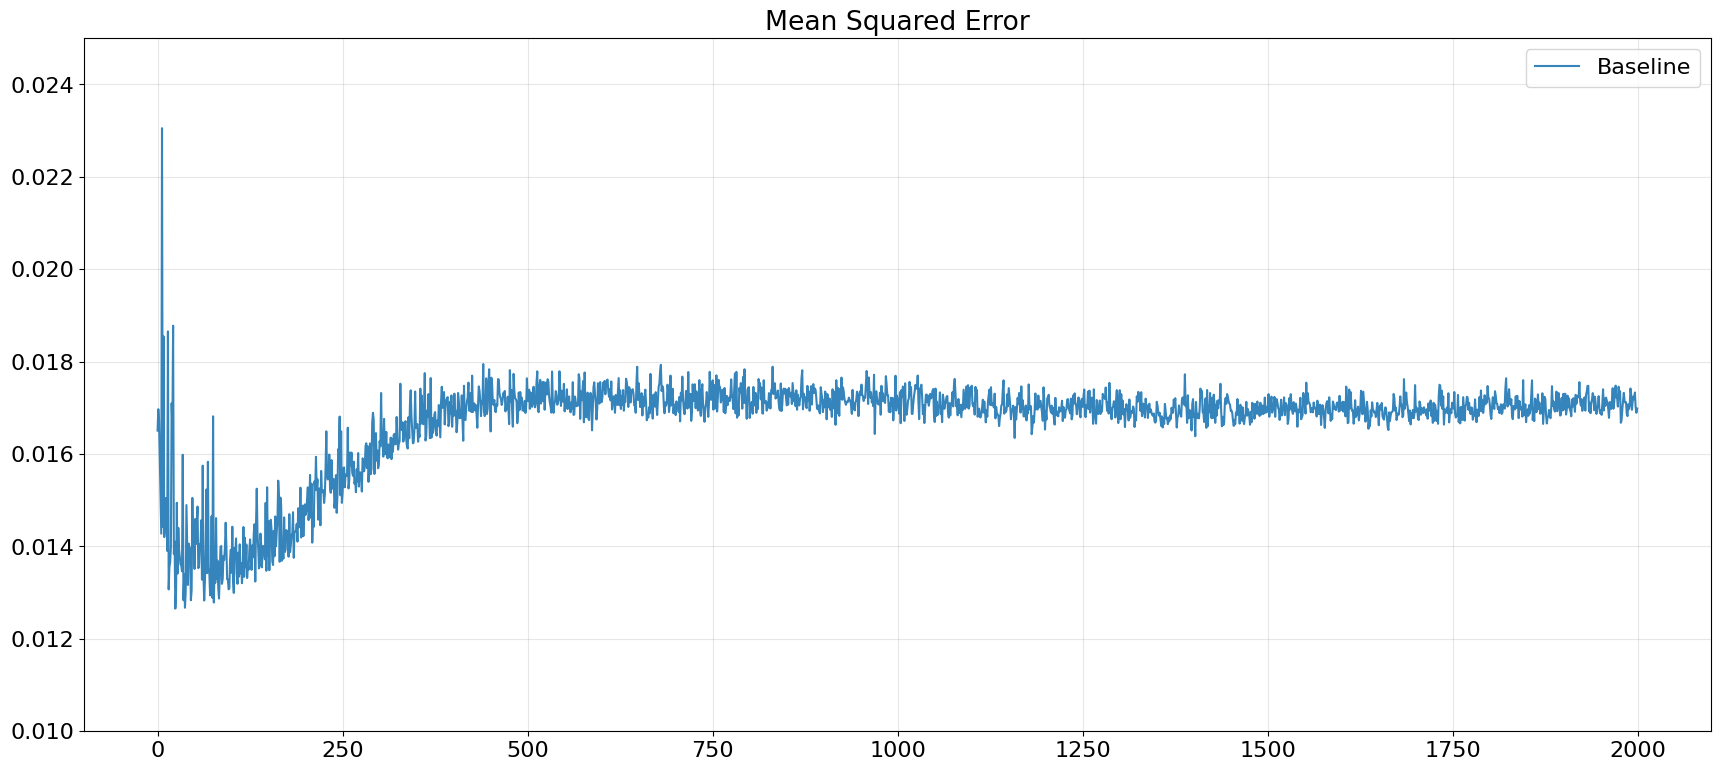

In [23]:
# Calculate validation Mean Squared Error (MSE)
val_squared_errors = (y_val - model.predict(X_val, verbose=0))**2
val_mse = np.mean(val_squared_errors).astype('float32')[0]

# Calculate test Mean Squared Error (MSE)
test_squared_errors = (y_test - model.predict(X_test, verbose=0))**2
test_mse = np.mean(test_squared_errors).astype('float32')[0]

# Add baseline model metadata to the dictionary
metadata['Baseline'] = {
    'model': model,
    'history': history,
    'patience': 0,
    'color': '#1f77b4',
    'val_score': val_mse,
    'test_score': test_mse
}

# Plot histories, including baseline model
plot_histories(metadata, baseline=True)

In [24]:
# Save the baseline model to a file
model.save('BaselineModel')

# Delete the current model
del model

# Load the saved baseline model
model = tfk.models.load_model('BaselineModel')

# Calculate validation Mean Squared Error (MSE) for the loaded model
squared_errors = (y_val - model.predict(X_val, verbose=0))**2
mse = np.mean(squared_errors).astype('float32')[0]
print('Baseline Validation MSE: %.4f' % mse)

Baseline Validation MSE: 0.0170


## Early Stopping

Assuming the goal of a training is to minimize the loss.

With this, the metric to be monitored would be **val_loss**, and mode would be **min**.

A model.fit() training loop will check at end of every epoch whether the val_loss is no longer decreasing, considering the **min_delta** and **patience** if applicable.

```
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
```



### Build the model

In [25]:
# Define the patience value for early stopping
patience = 200

# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_mse',          # Metric to monitor (validation mean squared error in this case)
    mode='min',                 # Mode to decide when to stop ('min' means stop when metric stops decreasing)
    patience=patience,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True   # Restore the best weights observed during training
)

# Store the callback in a list
callbacks = [early_stopping]

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 HiddenDense1 (Dense)        (None, 256)               3328      
                                                                 
 HiddenActivation1 (Activat  (None, 256)               0         
 ion)                                                            
                                                                 
 HiddenDense2 (Dense)        (None, 256)               65792     
                                                                 
 HiddenActivation2 (Activat  (None, 256)               0         
 ion)                                                            
                                                                 
 Output (Dense)              (None, 1)              

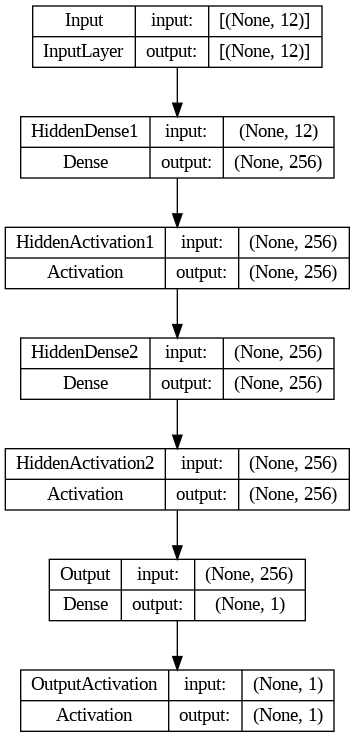

In [26]:
es_model = build_baseline_model(input_shape)
es_model.summary()
tfk.utils.plot_model(es_model, show_shapes=True, expand_nested=True)

### Train the model

In [27]:
es_history = es_model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks = callbacks
).history

Epoch 1/2000
82/82 [==============================] - 2s 11ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 3/2000
82/82 [==============================] - 1s 6ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 4/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 5/2000
82/82 [==============================] - 1s 6ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 6/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 7/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 8/2000
82/82 [==============================] - 1s 6ms/step - loss: 0

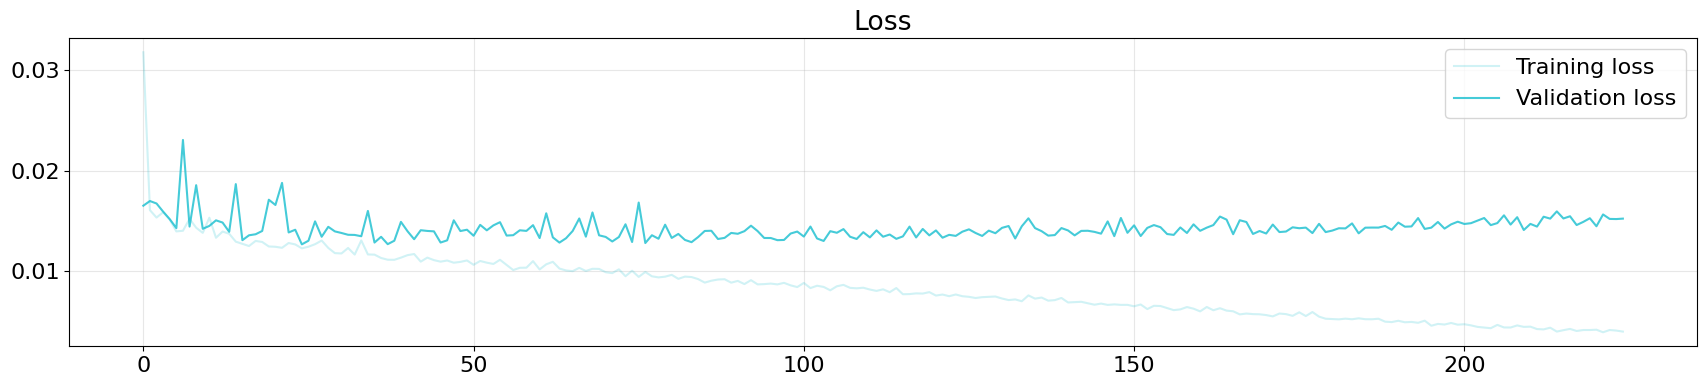

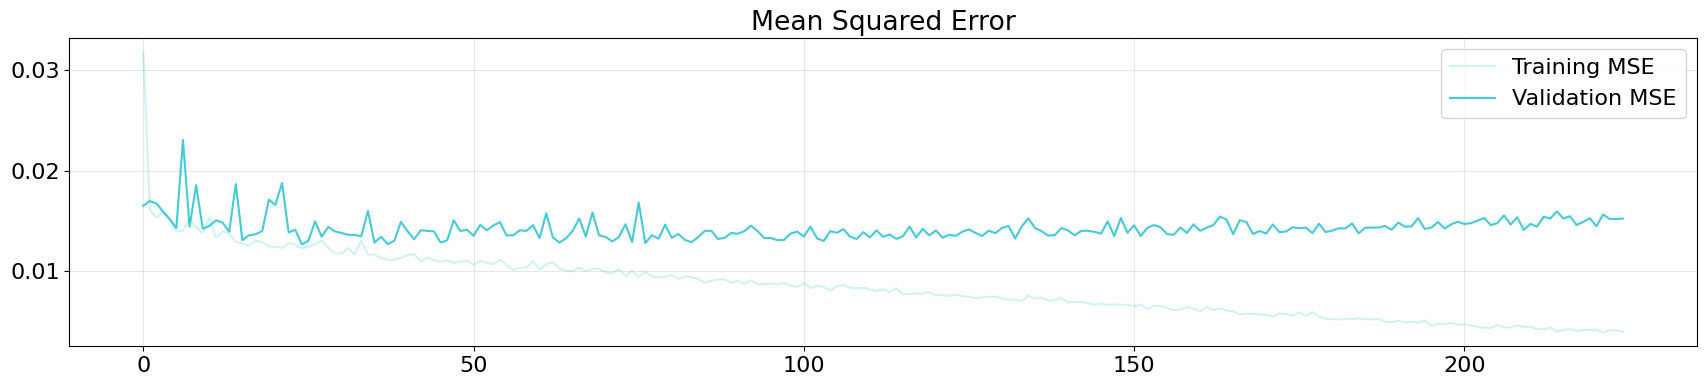

In [28]:
# Set the number of initial data points to ignore
ignore = 0

# Create a figure for loss visualization
plt.figure(figsize=(21, 4))

# Plot training and validation loss for early-stopped model
plt.plot(es_history['loss'][ignore:], label='Training loss', alpha=.2, color='#17becf')
plt.plot(es_history['val_loss'][ignore:], label='Validation loss', alpha=.8, color='#17becf')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create a figure for Mean Squared Error visualization
plt.figure(figsize=(21, 4))

# Plot training and validation MSE for early-stopped model
plt.plot(es_history['mse'][ignore:], label='Training MSE', alpha=.2, color='#17becf')
plt.plot(es_history['val_mse'][ignore:], label='Validation MSE', alpha=.8, color='#17becf')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)

# Display the plots
plt.show()

VALIDATION MSE
Baseline (es): 0.0127


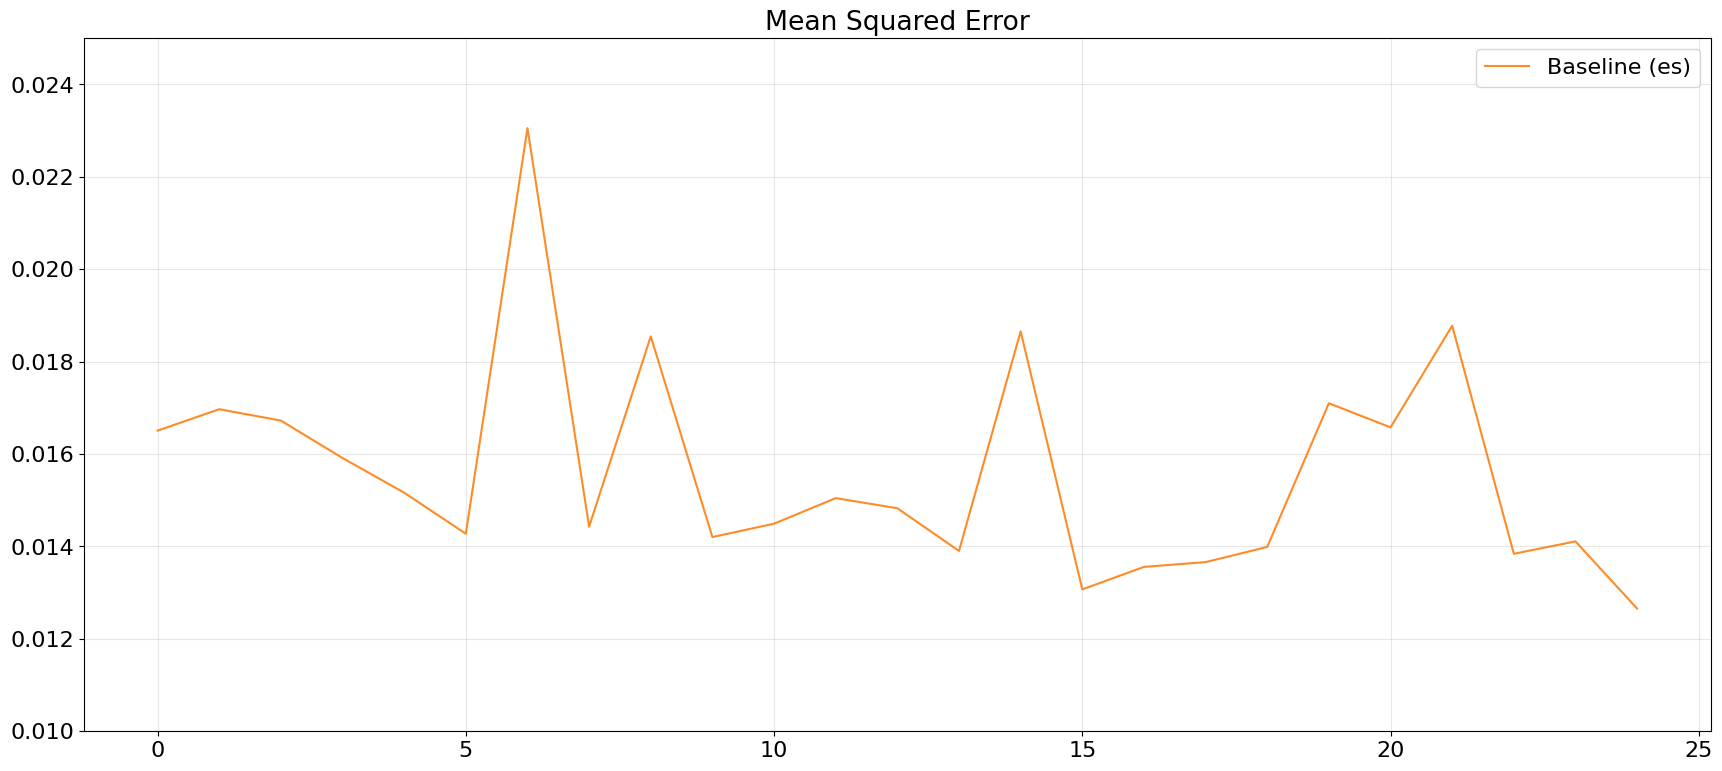

In [29]:
# Calculate validation Mean Squared Error (MSE) for the early-stopped model
es_val_squared_errors = (y_val - es_model.predict(X_val, verbose=0))**2
es_val_mse = np.mean(es_val_squared_errors).astype('float32')[0]

# Calculate test Mean Squared Error (MSE) for the early-stopped model
es_test_squared_errors = (y_test - es_model.predict(X_test, verbose=0))**2
es_test_mse = np.mean(es_test_squared_errors).astype('float32')[0]

# Add early-stopped model metadata to the dictionary
metadata['Baseline (es)'] = {
    'model': es_history,
    'history': es_history,
    'patience': patience,
    'color': '#ff7f0e',
    'val_score': es_val_mse,
    'test_score': es_test_mse
}

# Plot histories, including the early-stopped model
plot_histories(metadata)

VALIDATION MSE
Baseline: 0.0170
Baseline (es): 0.0127


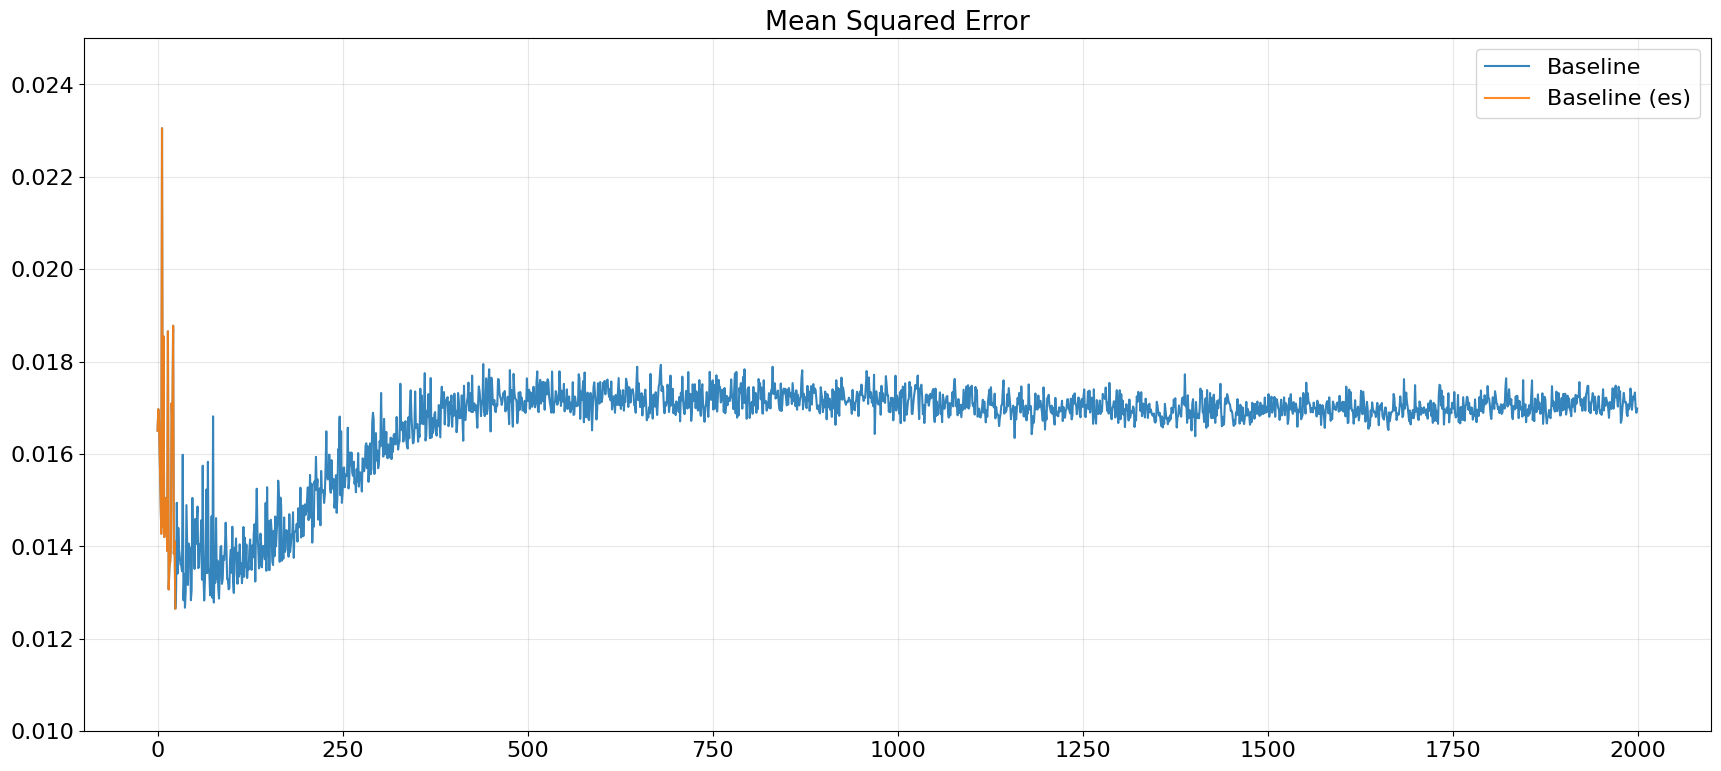

In [30]:
plot_histories(metadata, baseline=True)

In [31]:
# Save the early-stopped model to a file
es_model.save('EarlyStoppingModel')

# Delete the current early-stopped model
del es_model

# Load the saved early-stopped model
es_model = tfk.models.load_model('EarlyStoppingModel')

# Calculate validation Mean Squared Error (MSE) for the loaded early-stopped model
es_squared_errors = (y_val - es_model.predict(X_val, verbose=0))**2
es_mse = np.mean(es_squared_errors).astype('float32')[0]
print('Baseline (es) Validation MSE: %.4f' % es_mse)

Baseline (es) Validation MSE: 0.0127


## Learning rate scheduling

Reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a **factor** of 2-10 once learning stagnates. Alternatively, it is possible to reduce the learning rate by an epsilon factor with a smaller **patience**.


This callback monitors a quantity and if no improvement is seen for a patience number of epochs, the learning rate is reduced.

```
tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
    **kwargs
)
```



### Build the model

In [32]:
lr_patience = 5
lr_scheduler = tfk.callbacks.ReduceLROnPlateau(
    monitor='val_mse',     # Metric to monitor (validation mean squared error in this case)
    patience=lr_patience,  # Number of epochs with no improvement after which learning rate will be reduced
    factor=0.999,          # Factor by which the learning rate will be reduced (0.999 in this case)
    mode='min',            # Mode to decide when to reduce learning rate ('min' means reduce when metric stops decreasing)
    min_lr=1e-5            # Minimum learning rate
)

In [33]:
# Store the callbacks in a list
callbacks = [early_stopping, lr_scheduler]

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 HiddenDense1 (Dense)        (None, 256)               3328      
                                                                 
 HiddenActivation1 (Activat  (None, 256)               0         
 ion)                                                            
                                                                 
 HiddenDense2 (Dense)        (None, 256)               65792     
                                                                 
 HiddenActivation2 (Activat  (None, 256)               0         
 ion)                                                            
                                                                 
 Output (Dense)              (None, 1)              

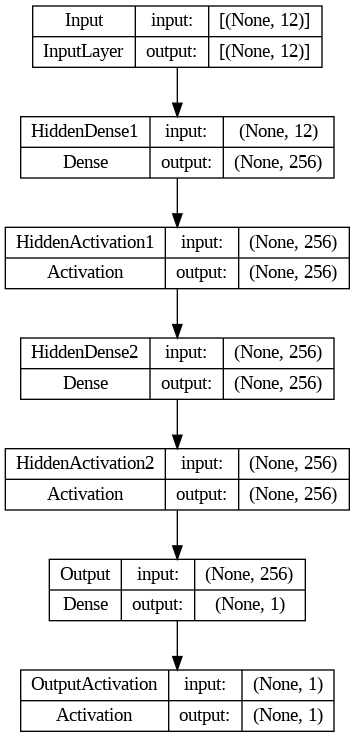

In [34]:
es_scheduler_model = build_baseline_model(input_shape)
es_scheduler_model.summary()
tfk.utils.plot_model(es_scheduler_model, show_shapes=True, expand_nested=True)

### Train the model

In [35]:
es_scheduler_history = es_scheduler_model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks = callbacks
).history

Epoch 1/2000
82/82 [==============================] - 1s 8ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0165 - val_mse: 0.0165 - lr: 0.0010
Epoch 2/2000
82/82 [==============================] - 1s 6ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0170 - val_mse: 0.0170 - lr: 0.0010
Epoch 3/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0167 - val_mse: 0.0167 - lr: 0.0010
Epoch 4/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0159 - val_mse: 0.0159 - lr: 0.0010
Epoch 5/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0152 - val_mse: 0.0152 - lr: 0.0010
Epoch 6/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0143 - val_mse: 0.0143 - lr: 0.0010
Epoch 7/2000
82/82 [==============================] - 1s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0231 - val_mse: 0.023

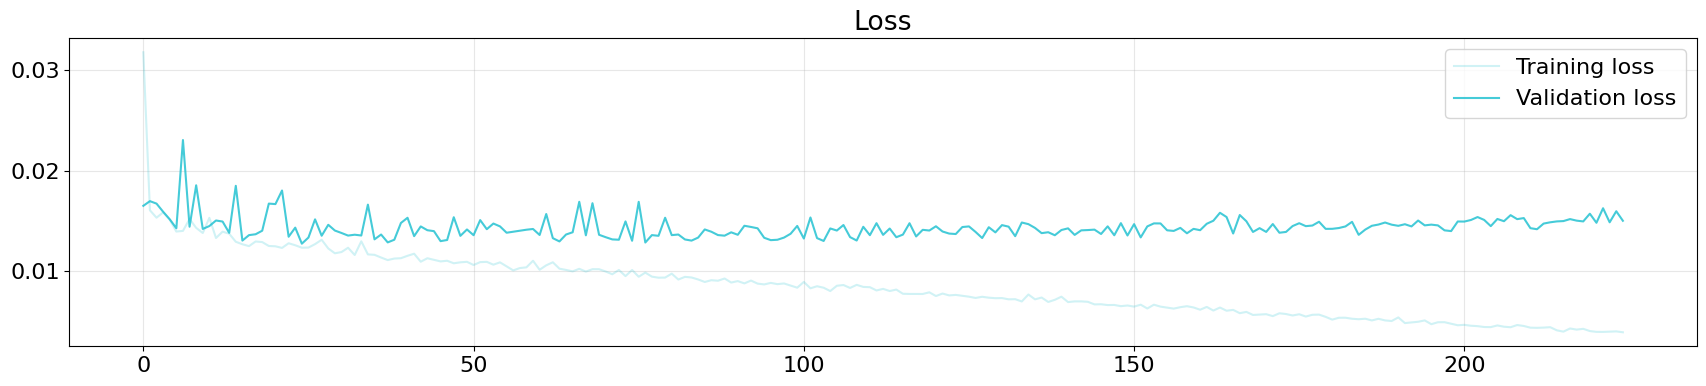

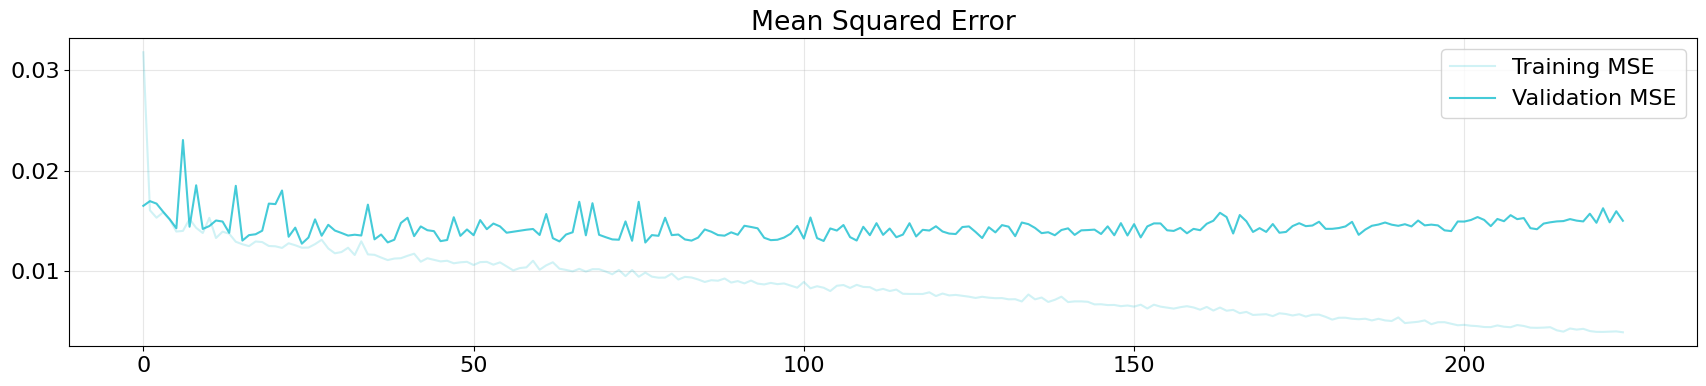

In [36]:
# Set the number of initial data points to ignore
ignore = 0

# Create a figure for loss visualization
plt.figure(figsize=(21, 4))

# Plot training and validation loss for early-stopped model
plt.plot(es_scheduler_history['loss'][ignore:], label='Training loss', alpha=.2, color='#17becf')
plt.plot(es_scheduler_history['val_loss'][ignore:], label='Validation loss', alpha=.8, color='#17becf')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create a figure for Mean Squared Error visualization
plt.figure(figsize=(21, 4))

# Plot training and validation MSE for early-stopped model
plt.plot(es_scheduler_history['mse'][ignore:], label='Training MSE', alpha=.2, color='#17becf')
plt.plot(es_scheduler_history['val_mse'][ignore:], label='Validation MSE', alpha=.8, color='#17becf')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)

# Display the plots
plt.show()

VALIDATION MSE
Baseline (es): 0.0127
Baseline (es+scr): 0.0127


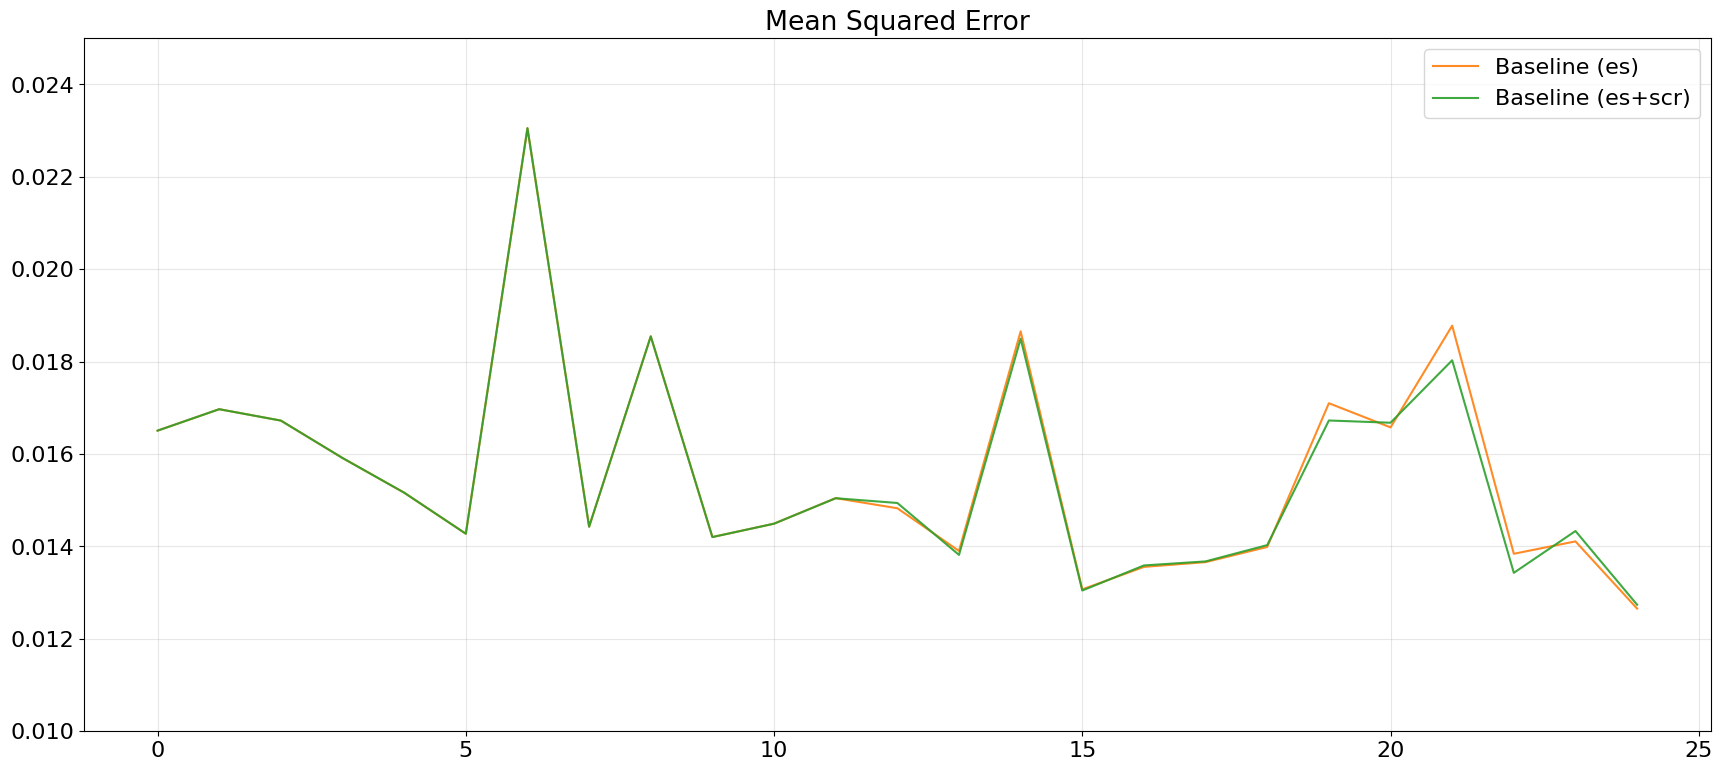

In [37]:
# Calculate validation Mean Squared Error (MSE) for the early-stopped model
es_scheduler_val_squared_errors = (y_val - es_scheduler_model.predict(X_val, verbose=0))**2
es_scheduler_val_mse = np.mean(es_scheduler_val_squared_errors).astype('float32')[0]

# Calculate test Mean Squared Error (MSE) for the early-stopped model
es_scheduler_test_squared_errors = (y_test - es_scheduler_model.predict(X_test, verbose=0))**2
es_scheduler_test_mse = np.mean(es_scheduler_test_squared_errors).astype('float32')[0]

# Add early-stopped model metadata to the dictionary
metadata['Baseline (es+scr)'] = {
    'model': es_scheduler_history,
    'history': es_scheduler_history,
    'patience': patience,
    'color': '#2ca02c',
    'val_score': es_scheduler_val_mse,
    'test_score': es_scheduler_test_mse
}

# Plot histories, including the early-stopped model
plot_histories(metadata)

In [38]:
# Save the early-stopped model with learning rate scheduler to a file
es_scheduler_model.save('EarlyStoppingLRScheduleModel')

# Delete the current early-stopped model
del es_scheduler_model

# Load the saved early-stopped model
es_scheduler_model = tfk.models.load_model('EarlyStoppingLRScheduleModel')

# Calculate validation Mean Squared Error (MSE) for the loaded early-stopped model
es_scheduler_squared_errors = (y_val - es_scheduler_model.predict(X_val, verbose=0))**2
es_scheduler_mse = np.mean(es_scheduler_squared_errors).astype('float32')[0]
print('Baseline (es+scr) Validation MSE: %.4f' % es_scheduler_mse)

Baseline (es+scr) Validation MSE: 0.0127


## Ridge regression

$$\mathrm{Ridge} (y, \hat{y}) = \frac{1}{N} \sum^N_{n=0} (y_n - g(x_n|w))^2 + \lambda\sum^K_{k=0}w_k^2 = \mathrm{MSE} (y, \hat{y}) + \lambda||w||_2^2
$$

### Build the model

In [39]:
def build_l2_model(input_shape, l2_lambda, learning_rate=1e-3, seed=seed):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    x = tfkl.Dense(units=256, kernel_initializer=tfk.initializers.HeUniform(seed=seed), name='HiddenDense1', kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))(input_layer)
    x = tfkl.Activation('relu', name='HiddenActivation1')(x)
    x = tfkl.Dense(units=256, kernel_initializer=tfk.initializers.HeUniform(seed=seed), name='HiddenDense2', kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))(x)
    x = tfkl.Activation('relu', name='HiddenActivation2')(x)
    output_layer = tfkl.Dense(units=1, kernel_initializer=tfk.initializers.GlorotUniform(seed=seed), name='Output',
                               kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))(x)
    output_activation = tfkl.Activation('linear', name='OutputActivation')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='l2_model')

    # Compile the model
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

Model: "l2_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 HiddenDense1 (Dense)        (None, 256)               3328      
                                                                 
 HiddenActivation1 (Activat  (None, 256)               0         
 ion)                                                            
                                                                 
 HiddenDense2 (Dense)        (None, 256)               65792     
                                                                 
 HiddenActivation2 (Activat  (None, 256)               0         
 ion)                                                            
                                                                 
 Output (Dense)              (None, 1)                 257

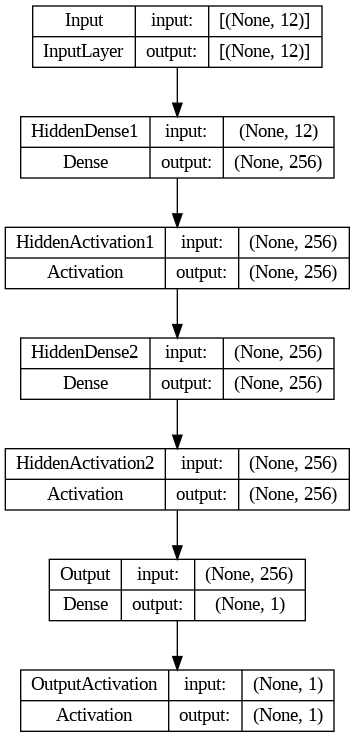

In [40]:
l2_lambda = 2e-5

l2_model = build_l2_model(input_shape, l2_lambda)
l2_model.summary()
tfk.utils.plot_model(l2_model, show_shapes=True, expand_nested=True)

### Train the model

In [41]:
l2_history = l2_model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks = callbacks
).history

Epoch 1/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0507 - mse: 0.0318 - val_loss: 0.0341 - val_mse: 0.0166 - lr: 0.0010
Epoch 2/2000
82/82 [==============================] - 0s 4ms/step - loss: 0.0328 - mse: 0.0160 - val_loss: 0.0333 - val_mse: 0.0171 - lr: 0.0010
Epoch 3/2000
82/82 [==============================] - 0s 5ms/step - loss: 0.0311 - mse: 0.0153 - val_loss: 0.0318 - val_mse: 0.0164 - lr: 0.0010
Epoch 4/2000
82/82 [==============================] - 0s 4ms/step - loss: 0.0311 - mse: 0.0159 - val_loss: 0.0306 - val_mse: 0.0157 - lr: 0.0010
Epoch 5/2000
82/82 [==============================] - 0s 4ms/step - loss: 0.0298 - mse: 0.0152 - val_loss: 0.0298 - val_mse: 0.0154 - lr: 0.0010
Epoch 6/2000
82/82 [==============================] - 0s 5ms/step - loss: 0.0281 - mse: 0.0140 - val_loss: 0.0285 - val_mse: 0.0146 - lr: 0.0010
Epoch 7/2000
82/82 [==============================] - 0s 4ms/step - loss: 0.0279 - mse: 0.0141 - val_loss: 0.0371 - val_mse: 0.023

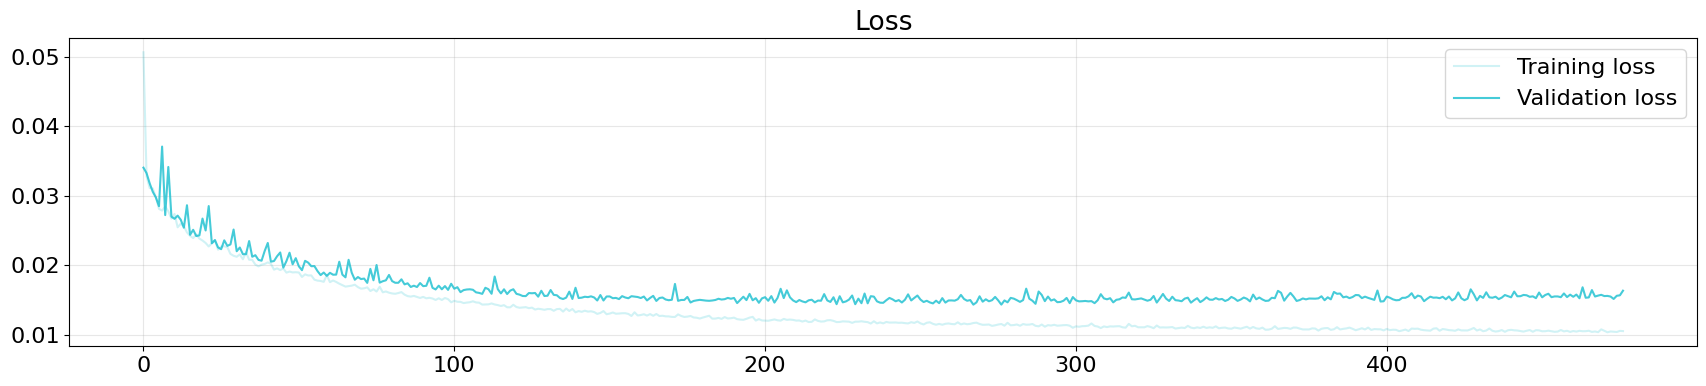

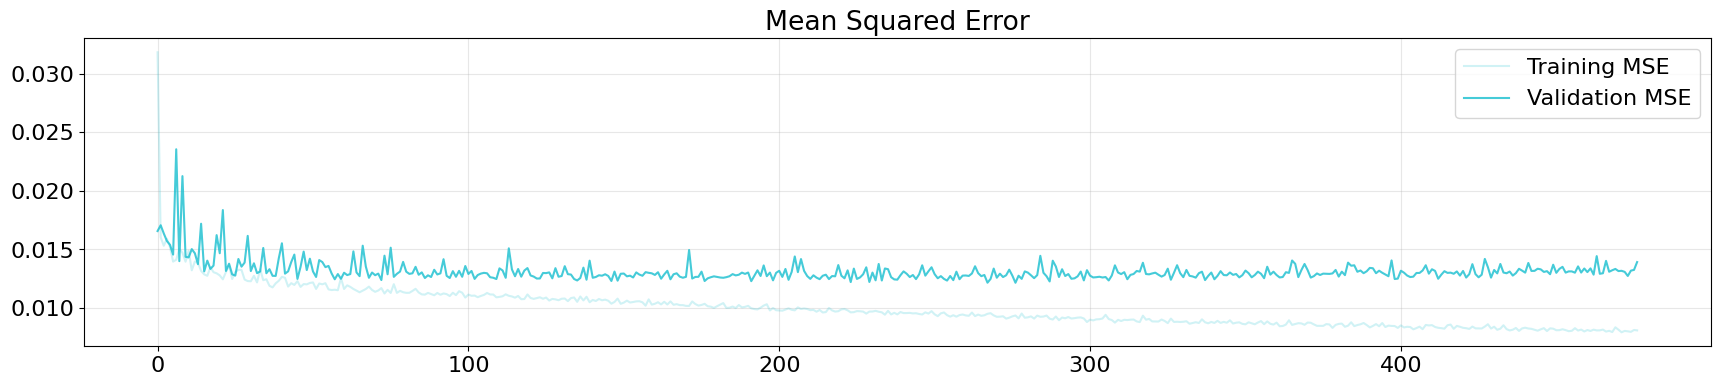

In [42]:
# Set the number of initial data points to ignore
ignore = 0

# Create a figure for loss visualization
plt.figure(figsize=(21, 4))

# Plot training and validation loss for L2-regularized model
plt.plot(l2_history['loss'][ignore:], label='Training loss', alpha=.2, color='#17becf')
plt.plot(l2_history['val_loss'][ignore:], label='Validation loss', alpha=.8, color='#17becf')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create a figure for Mean Squared Error visualization
plt.figure(figsize=(21, 4))

# Plot training and validation MSE for L2-regularized model
plt.plot(l2_history['mse'][ignore:], label='Training MSE', alpha=.2, color='#17becf')
plt.plot(l2_history['val_mse'][ignore:], label='Validation MSE', alpha=.8, color='#17becf')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)

# Display the plots
plt.show()

VALIDATION MSE
Baseline (es): 0.0127
Baseline (es+scr): 0.0127
Ridge: 0.0122


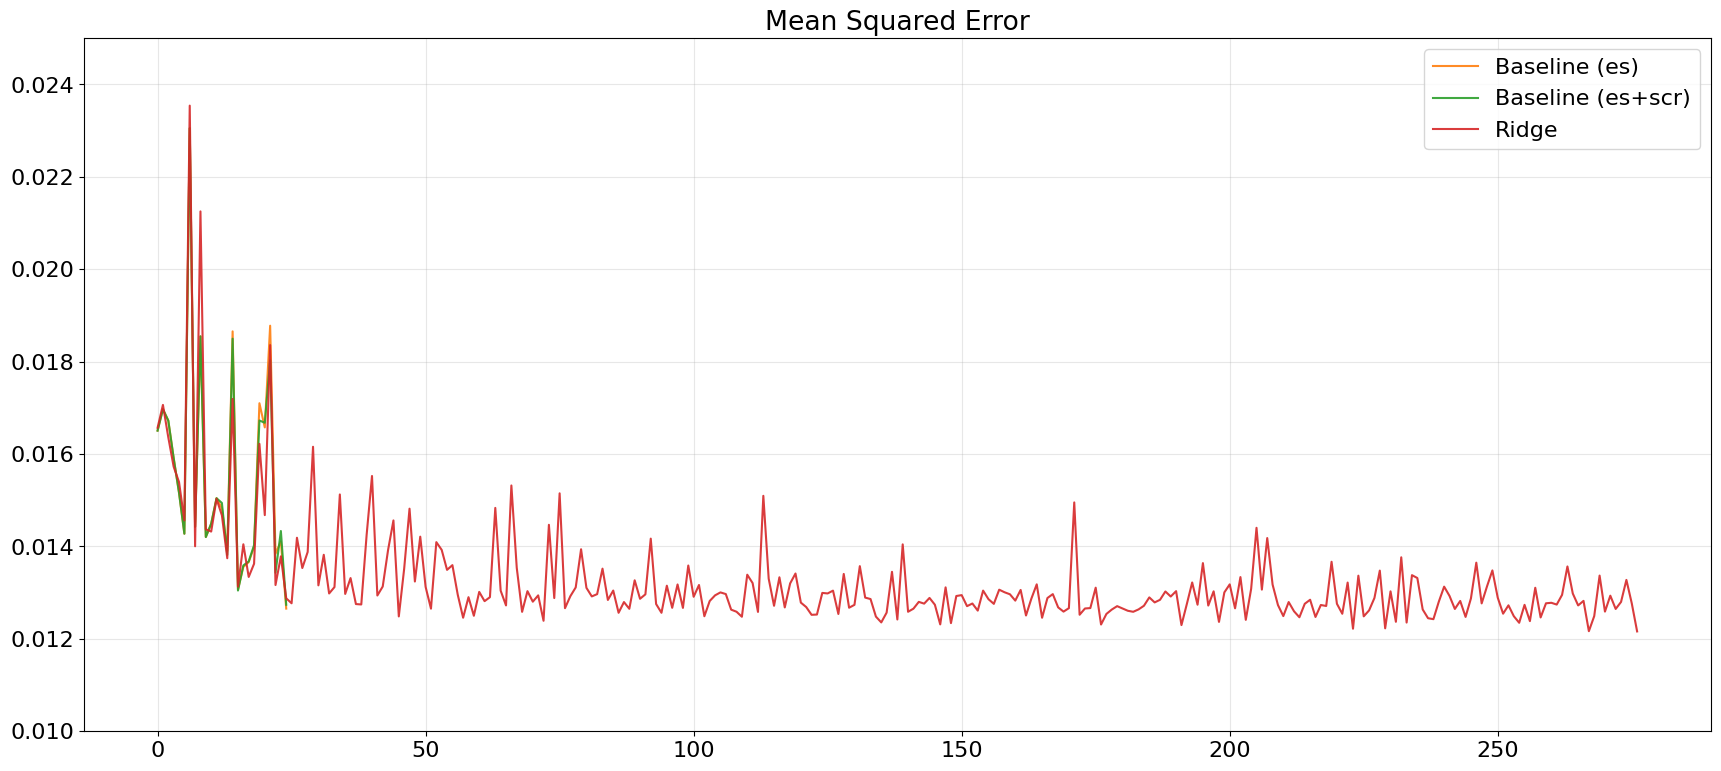

In [43]:
# Calculate validation Mean Squared Error (MSE) for the L2-regularized model
l2_val_squared_errors = (y_val - l2_model.predict(X_val, verbose=0))**2
l2_val_mse = np.mean(l2_val_squared_errors).astype('float32')[0]

# Calculate test Mean Squared Error (MSE) for the L2-regularized model
l2_test_squared_errors = (y_test - l2_model.predict(X_test, verbose=0))**2
l2_test_mse = np.mean(l2_test_squared_errors).astype('float32')[0]

# Add L2-regularized model metadata to the dictionary
metadata['Ridge'] = {
    'model': l2_model,
    'history': l2_history,
    'patience': patience,
    'color': '#d62728',
    'val_score': l2_val_mse,
    'test_score': l2_test_mse
}

# Plot training histories, including the L2-regularized model
plot_histories(metadata)

In [44]:
# Save the L2-regularized model to a file
l2_model.save('RidgeModel')

# Delete the current L2-regularized model
del l2_model

# Load the saved L2-regularized model
l2_model = tfk.models.load_model('RidgeModel')

# Calculate validation Mean Squared Error (MSE) for the loaded L2-regularized model
l2_squared_errors = (y_val - l2_model.predict(X_val, verbose=0))**2
l2_mse = np.mean(l2_squared_errors).astype('float32')[0]
print('Ridge Validation MSE: %.4f' % l2_mse)

Ridge Validation MSE: 0.0122


## Dropout

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference.



```
tf.keras.layers.Dropout(
    rate,
    noise_shape=None,
    seed=None,
    **kwargs
)
```



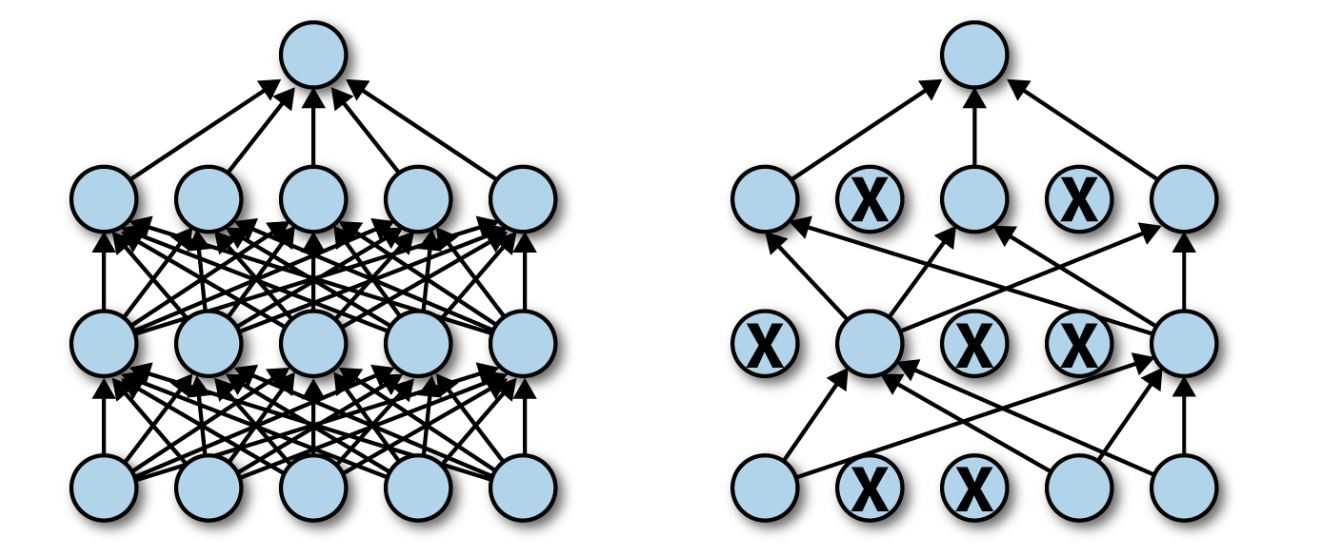

### Build the model

In [45]:
def build_dropout_model(input_shape, dropout_rate, learning_rate=1e-3, seed=seed):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer = tfkl.Dense(units=256, kernel_initializer=tfk.initializers.HeUniform(seed=seed), name='HiddenDense1')(input_layer)
    hidden_activation = tfkl.Activation('relu', name='HiddenActivation1')(hidden_layer)
    dropout = tfkl.Dropout(dropout_rate, seed=seed)(hidden_activation)
    hidden_layer = tfkl.Dense(units=256, kernel_initializer=tfk.initializers.HeUniform(seed=seed), name='HiddenDense2')(dropout)
    hidden_activation = tfkl.Activation('relu', name='HiddenActivation2')(hidden_layer)
    dropout = tfkl.Dropout(dropout_rate, seed=seed)(hidden_activation)
    output_layer = tfkl.Dense(units=1, kernel_initializer=tfk.initializers.GlorotUniform(seed=seed), name='Output')(dropout)
    output_activation = tfkl.Activation('linear', name='OutputActivation')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='dropout_model')

    # Compile the model
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

Model: "dropout_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 HiddenDense1 (Dense)        (None, 256)               3328      
                                                                 
 HiddenActivation1 (Activat  (None, 256)               0         
 ion)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 HiddenDense2 (Dense)        (None, 256)               65792     
                                                                 
 HiddenActivation2 (Activat  (None, 256)               0         
 ion)                                                

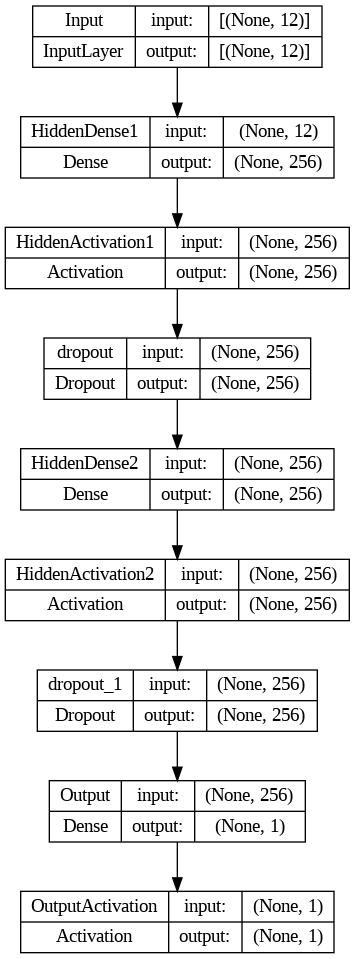

In [46]:
dropout_rate = 1/6

dropout_model = build_dropout_model(input_shape, dropout_rate)
dropout_model.summary()
tfk.utils.plot_model(dropout_model, show_shapes=True, expand_nested=True)

### Train the model

In [47]:
dropout_history = dropout_model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks = callbacks
).history

Epoch 1/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0873 - mse: 0.0873 - val_loss: 0.0187 - val_mse: 0.0187 - lr: 0.0010
Epoch 2/2000
82/82 [==============================] - 0s 5ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0194 - val_mse: 0.0194 - lr: 0.0010
Epoch 3/2000
82/82 [==============================] - 0s 5ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0174 - val_mse: 0.0174 - lr: 0.0010
Epoch 4/2000
82/82 [==============================] - 0s 5ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0204 - val_mse: 0.0204 - lr: 0.0010
Epoch 5/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0197 - val_mse: 0.0197 - lr: 0.0010
Epoch 6/2000
82/82 [==============================] - 1s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0282 - val_mse: 0.0282 - lr: 0.0010
Epoch 7/2000
82/82 [==============================] - 1s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0242 - val_mse: 0.024

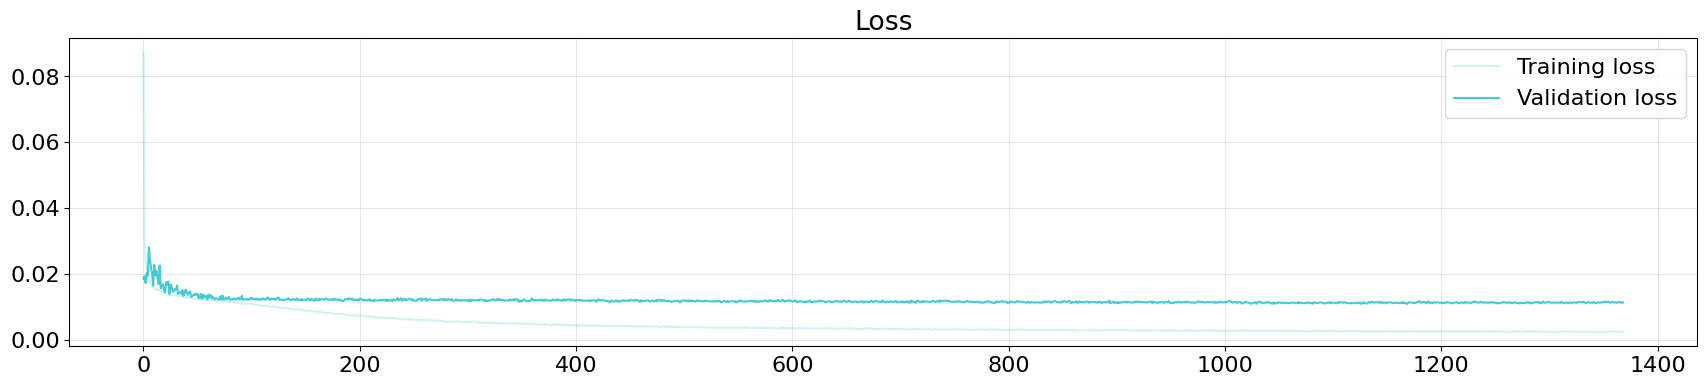

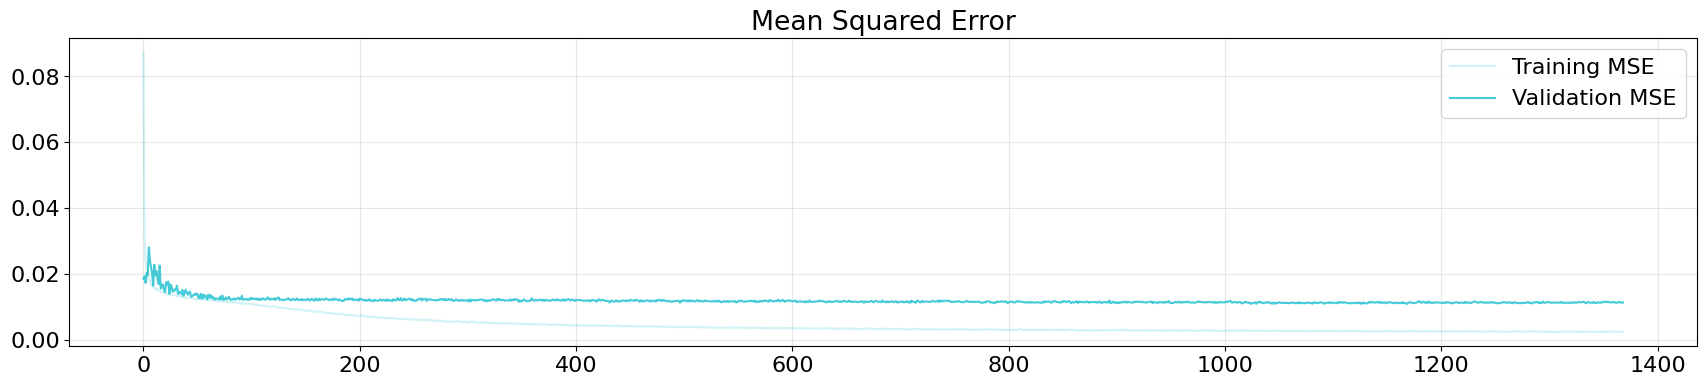

In [48]:
# Set the number of initial data points to ignore
ignore = 0

# Create a figure for loss visualization
plt.figure(figsize=(21, 4))

# Plot training and validation loss for model with dropout layers
plt.plot(dropout_history['loss'][ignore:], label='Training loss', alpha=.2, color='#17becf')
plt.plot(dropout_history['val_loss'][ignore:], label='Validation loss', alpha=.8, color='#17becf')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create a figure for Mean Squared Error visualization
plt.figure(figsize=(21, 4))

# Plot training and validation MSE for model with dropout layers
plt.plot(dropout_history['mse'][ignore:], label='Training MSE', alpha=.2, color='#17becf')
plt.plot(dropout_history['val_mse'][ignore:], label='Validation MSE', alpha=.8, color='#17becf')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)

# Display the plots
plt.show()

VALIDATION MSE
Baseline (es): 0.0127
Baseline (es+scr): 0.0127
Ridge: 0.0122
Dropout: 0.0110


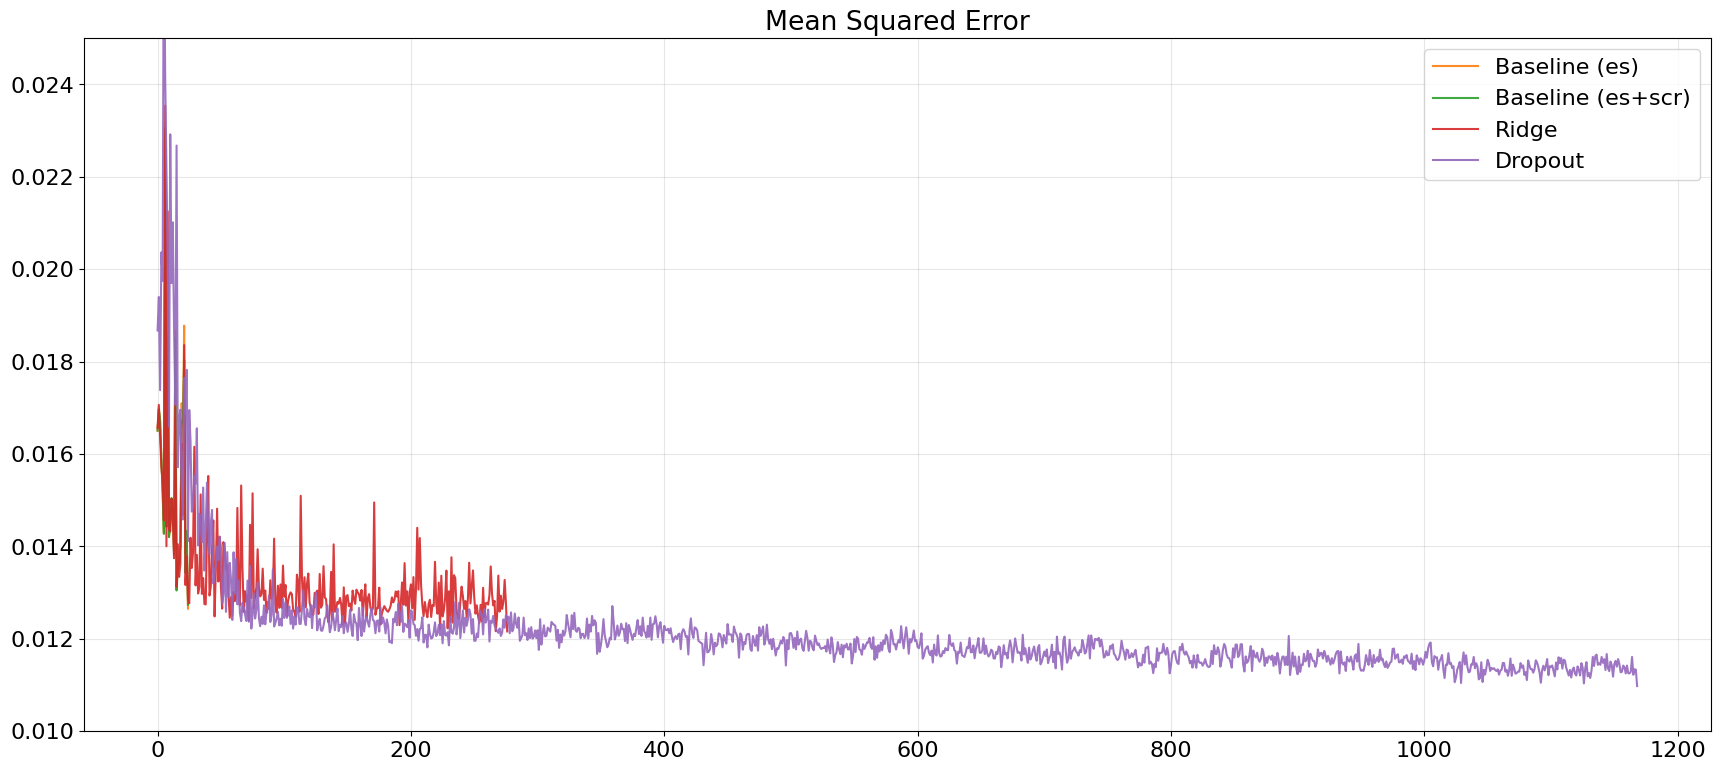

In [49]:
# Calculate validation Mean Squared Error (MSE) for the model with dropout layers
dropout_val_squared_errors = (y_val - dropout_model.predict(X_val, verbose=0))**2
dropout_val_mse = np.mean(dropout_val_squared_errors).astype('float32')[0]

# Calculate test Mean Squared Error (MSE) for the model with dropout layers
dropout_test_squared_errors = (y_test - dropout_model.predict(X_test, verbose=0))**2
dropout_test_mse = np.mean(dropout_test_squared_errors).astype('float32')[0]

# Add model with dropout layers metadata to the dictionary
metadata['Dropout'] = {
    'model': dropout_model,
    'history': dropout_history,
    'patience': patience,
    'color': '#9467bd',
    'val_score': dropout_val_mse,
    'test_score': dropout_test_mse
}

# Plot training histories, including the model with dropout layers
plot_histories(metadata)

In [50]:
# Save the model with dropout layers to a file
dropout_model.save('DropoutModel')

# Delete the current model with dropout layers
del dropout_model

# Load the saved model with dropout layers
dropout_model = tfk.models.load_model('DropoutModel')

# Calculate validation Mean Squared Error (MSE) for the loaded model with dropout layers
dropout_squared_errors = (y_val - dropout_model.predict(X_val, verbose=0))**2
dropout_mse = np.mean(dropout_squared_errors).astype('float32')[0]
print('Dropout Validation MSE: %.4f' % dropout_mse)

Dropout Validation MSE: 0.0110


## Results

VALIDATION MSE
Baseline: 0.0170
Baseline (es): 0.0127
Baseline (es+scr): 0.0127
Ridge: 0.0122
Dropout: 0.0110


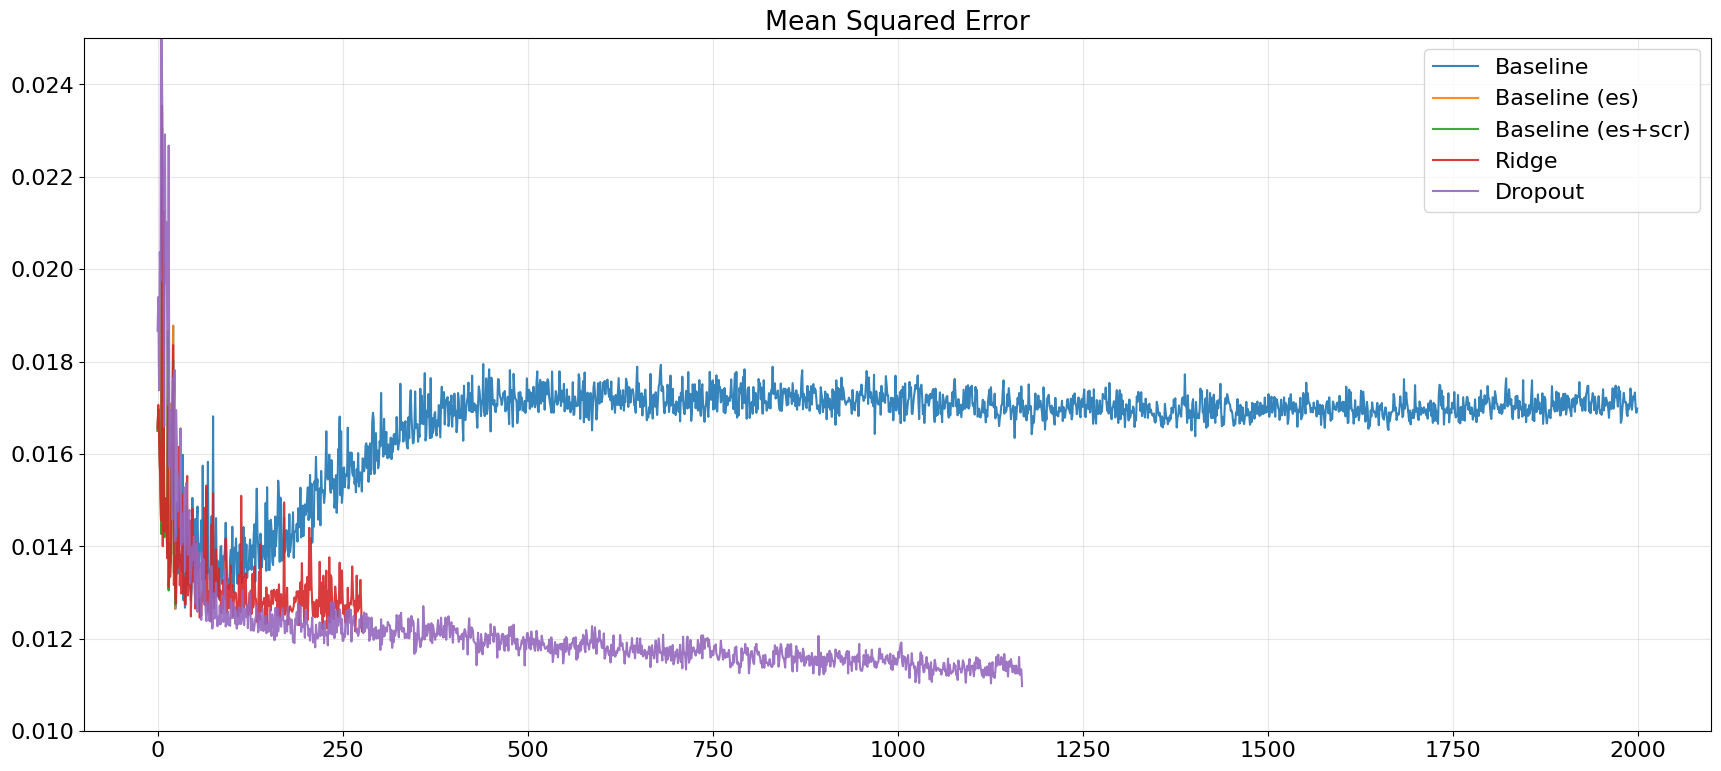

In [51]:
# Compare all the trainings
plot_histories(metadata, baseline=True)

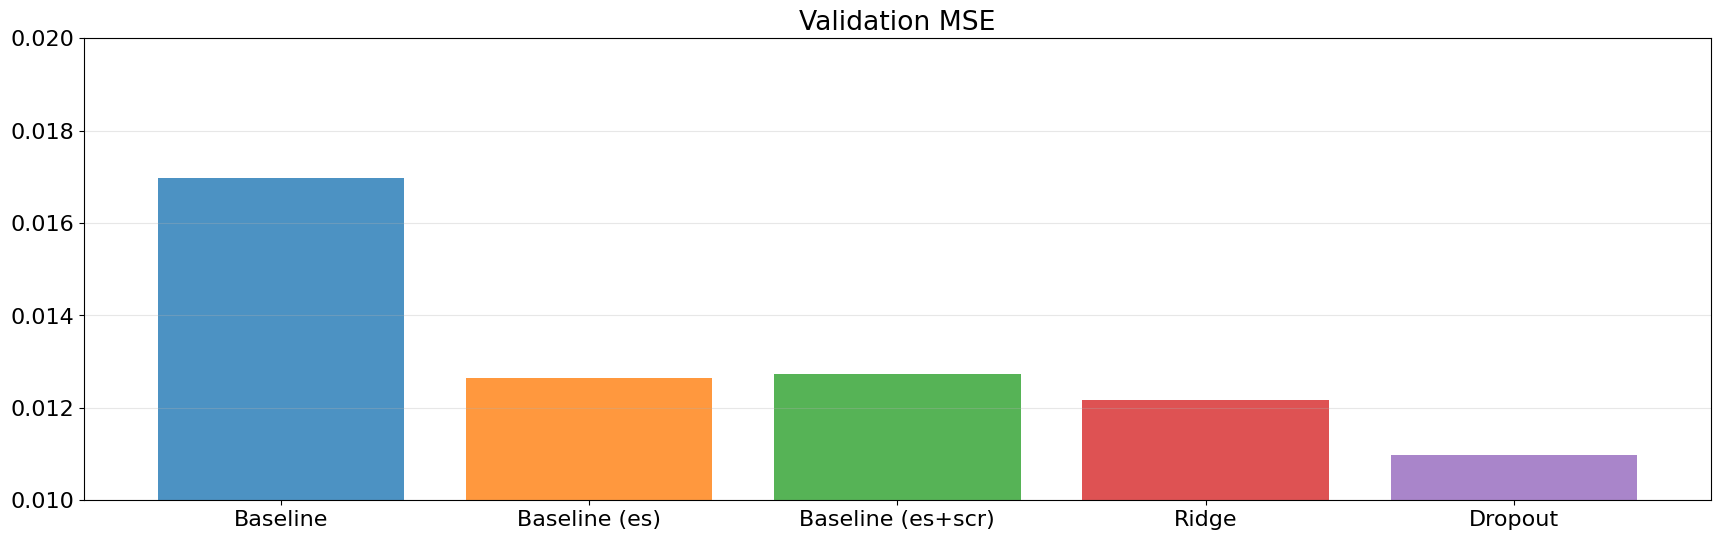

In [52]:
# Create a bar chart for validation MSE of different models
plt.figure(figsize=(21, 6))
for m in metadata.keys():
    plt.bar(m, metadata[m]['val_score'], color=metadata[m]['color'], alpha=.8)
plt.ylim(0.01, .02)
plt.title('Validation MSE')
plt.grid(alpha=.3, axis='y')
plt.show()

Best model loading...
Best model loaded!
Train Performance
MSE: 0.0015


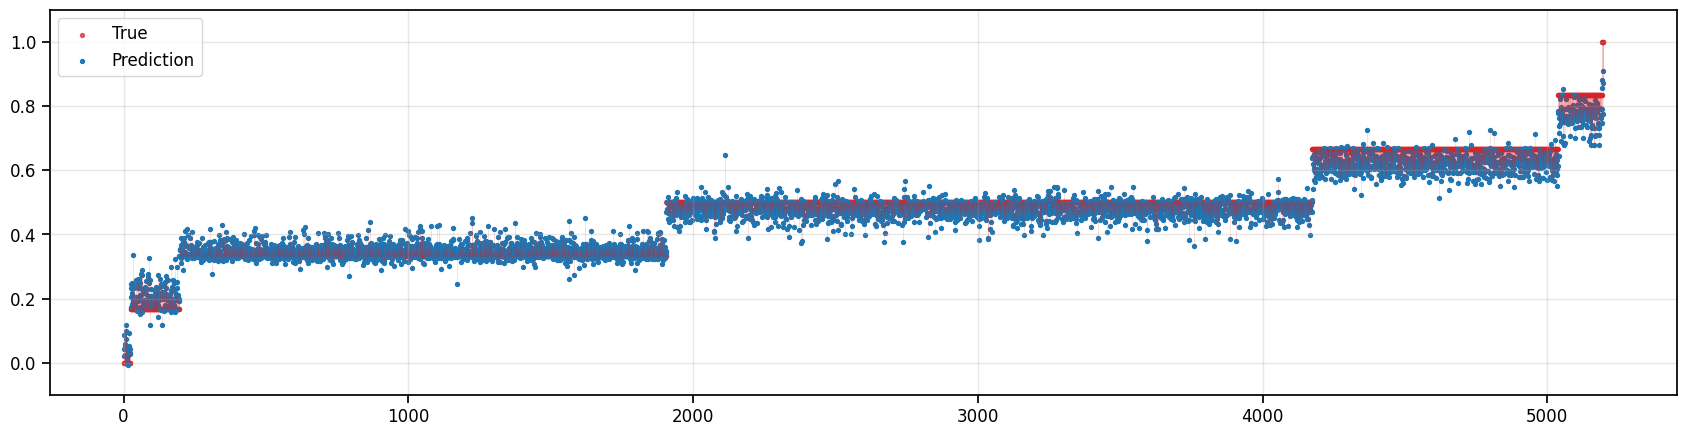

Validation Performance
MSE: 0.0110


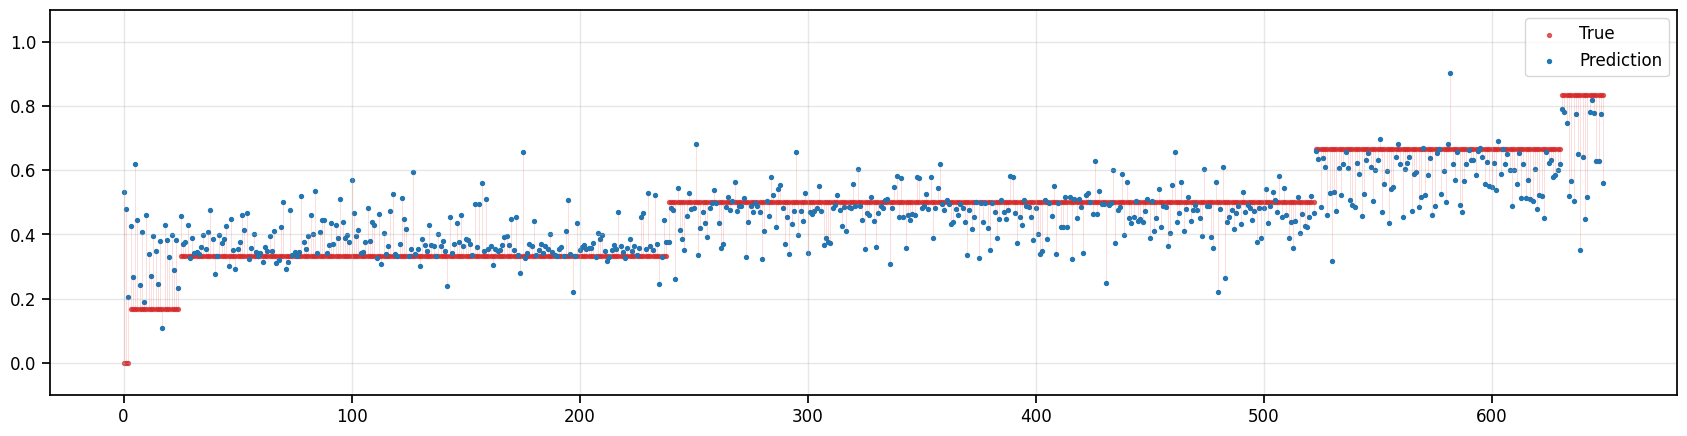

Test Performance
MSE: 0.0118


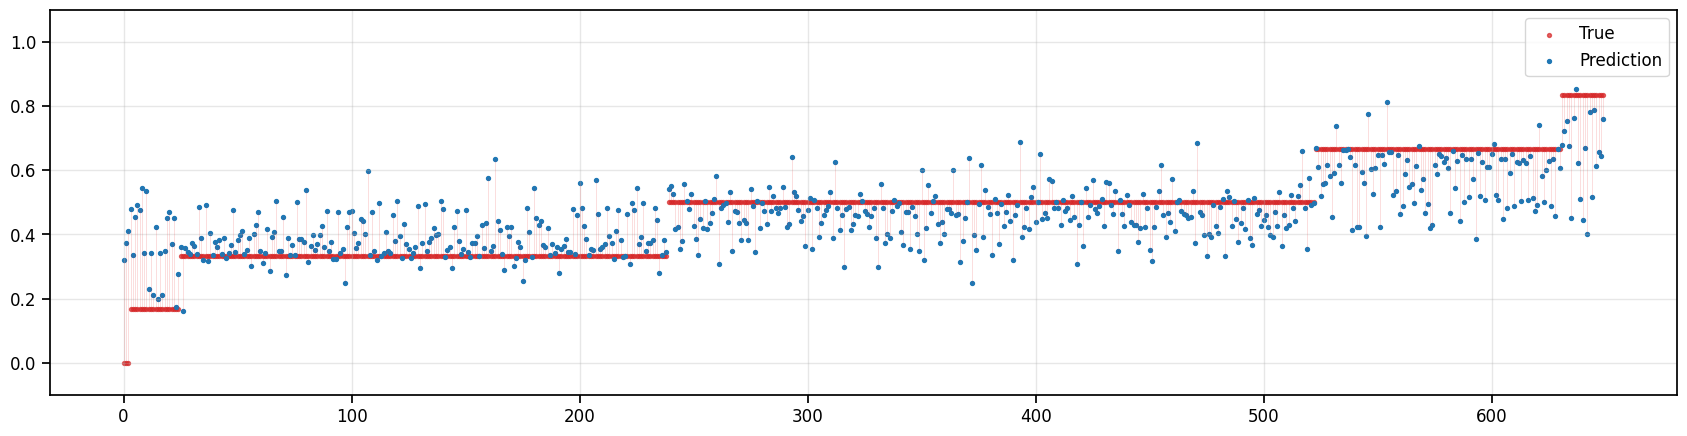

In [53]:
# Load the best model
print('Best model loading...')
dropout_model = tfk.models.load_model('DropoutModel')
print('Best model loaded!')

# Evaluate and plot performance on the training data
print('Train Performance')
plot_residuals(dropout_model, X_train.copy(), y_train.copy())

# Evaluate and plot performance on the validation data
print('Validation Performance')
plot_residuals(dropout_model, X_val.copy(), y_val.copy())

# Evaluate and plot performance on the test data
print('Test Performance')
plot_residuals(dropout_model, X_test.copy(), y_test.copy())

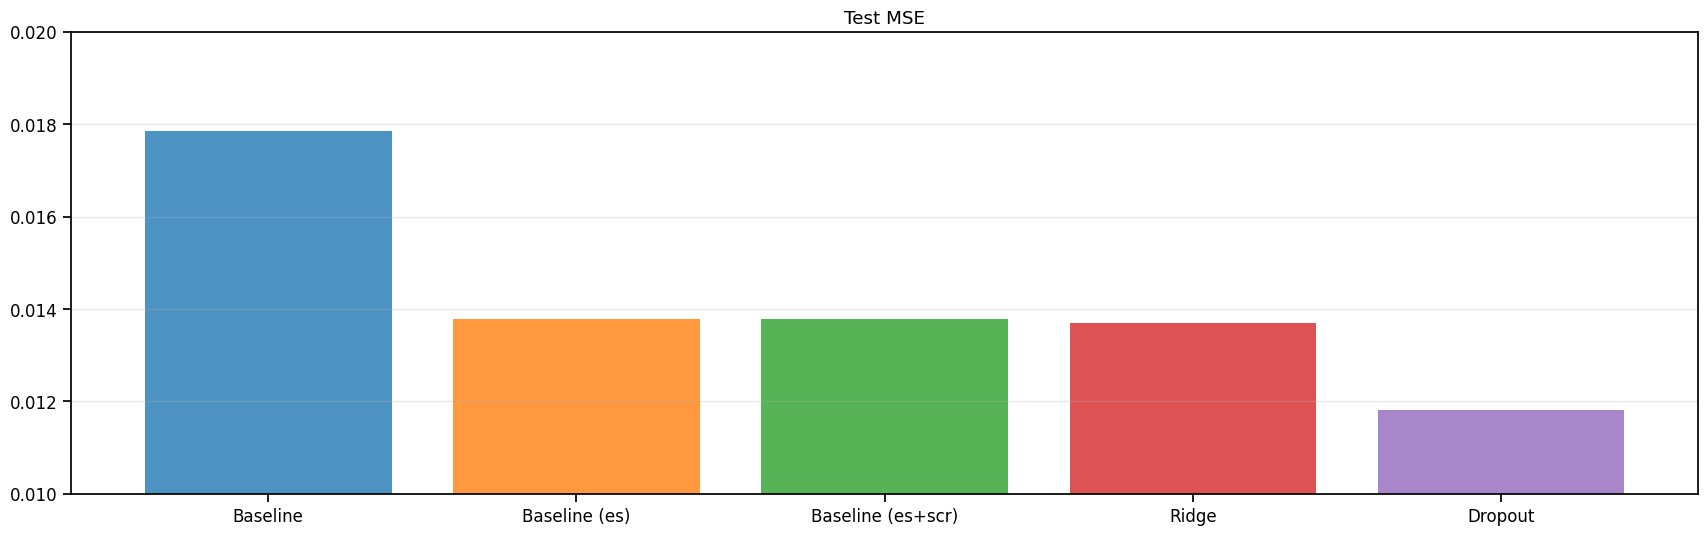

In [54]:
# Create a bar chart for test MSE of different models
plt.figure(figsize=(21, 6))
for m in metadata.keys():
    plt.bar(m, metadata[m]['test_score'], color=metadata[m]['color'], alpha=.8)
plt.ylim(0.01, .02)
plt.title('Test MSE')
plt.grid(alpha=.3, axis='y')
plt.show()

## (Extra) K-Fold Cross-Validation

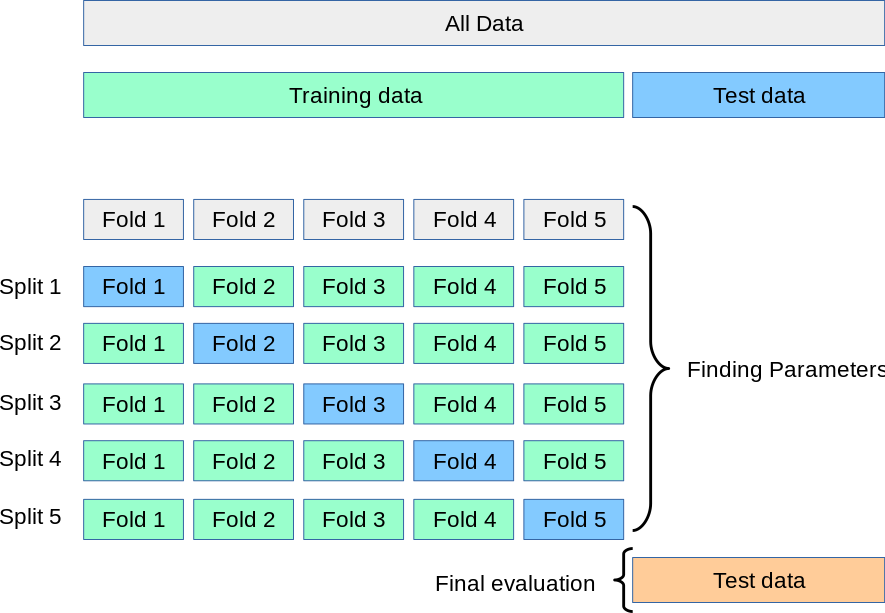

In [ ]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store training histories, scores, and best epochs
histories = []
scores = []
best_epochs = []

# Create a KFold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Loop through each fold
for fold_idx, (train_idx, valid_idx) in enumerate(kfold.split(X_train_val, y_train_val)):

  print("Starting training on fold num: {}".format(fold_idx+1))

  # Build a new dropout model for each fold
  k_model = build_dropout_model(input_shape, dropout_rate)

  # Train the model on the training data for this fold
  history = k_model.fit(
    x = X_train_val.iloc[train_idx],
    y = y_train_val.iloc[train_idx],
    validation_data=(X_train_val.iloc[valid_idx], y_train_val.iloc[valid_idx]),
    batch_size = batch_size,
    epochs = epochs,
    callbacks = callbacks,
    verbose = 0
  ).history

  # Evaluate the model on the validation data for this fold
  score = k_model.evaluate(X_train_val.iloc[valid_idx], y_train_val.iloc[valid_idx], verbose=0)
  scores.append(score[1])

  # Calculate the best epoch for early stopping
  best_epoch = len(history['loss']) - patience
  best_epochs.append(best_epoch)

  # Store the training history for this fold
  histories.append(history)

Starting training on fold num: 1
Starting training on fold num: 2
Starting training on fold num: 3
Starting training on fold num: 4
Starting training on fold num: 5
Starting training on fold num: 6
Starting training on fold num: 7
Starting training on fold num: 8
Starting training on fold num: 9
Starting training on fold num: 10


MSE
Mean: 0.0108
Std:  0.0008


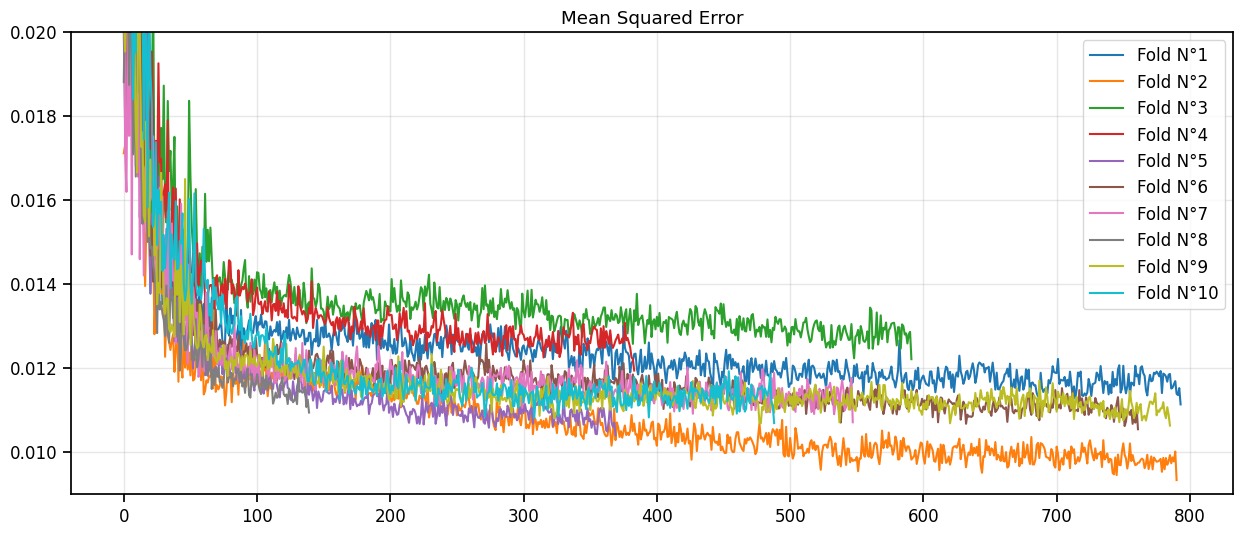

In [ ]:
# Define a list of colors for plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Print mean and standard deviation of MSE scores
print("MSE")
print(f"Mean: {np.mean(scores).round(4)}\nStd:  {np.std(scores).round(4)}")

# Create a figure for MSE visualization
plt.figure(figsize=(15,6))

# Plot MSE for each fold
for fold_idx in range(num_folds):
  plt.plot(histories[fold_idx]['val_mse'][:-patience], color=colors[fold_idx], label=f'Fold N°{fold_idx+1}')
  plt.ylim(0.009, 0.02)
  plt.title('Mean Squared Error')
  plt.legend(loc='upper right')
  plt.grid(alpha=.3)

# Show the plot
plt.show()

In [ ]:
# Calculate the average best epoch
avg_epochs = int(np.mean(best_epochs))
print(f"Best average epoch: {avg_epochs}")

Best average epoch: 565


In [ ]:
# Build the final model using the calculated average best epoch
final_model = build_dropout_model(input_shape, dropout_rate)

# Train the final model on the combined training and validation data
final_history = final_model.fit(
    x = X_train_val,
    y = y_train_val,
    batch_size = batch_size,
    epochs = avg_epochs
).history

Epoch 1/565
92/92 [==============================] - 1s 4ms/step - loss: 0.0772 - mse: 0.0772
Epoch 2/565
92/92 [==============================] - 0s 4ms/step - loss: 0.0285 - mse: 0.0285
Epoch 3/565
92/92 [==============================] - 0s 4ms/step - loss: 0.0224 - mse: 0.0224
Epoch 4/565
92/92 [==============================] - 0s 4ms/step - loss: 0.0205 - mse: 0.0205
Epoch 5/565
92/92 [==============================] - 0s 4ms/step - loss: 0.0189 - mse: 0.0189
Epoch 6/565
92/92 [==============================] - 0s 4ms/step - loss: 0.0176 - mse: 0.0176
Epoch 7/565
92/92 [==============================] - 0s 4ms/step - loss: 0.0170 - mse: 0.0170
Epoch 8/565
92/92 [==============================] - 0s 4ms/step - loss: 0.0164 - mse: 0.0164
Epoch 9/565
92/92 [==============================] - 0s 4ms/step - loss: 0.0166 - mse: 0.0166
Epoch 10/565
92/92 [==============================] - 0s 4ms/step - loss: 0.0158 - mse: 0.0158
Epoch 11/565
92/92 [==============================] - 0s 5m

Final Model Test Performance
MSE: 0.0127


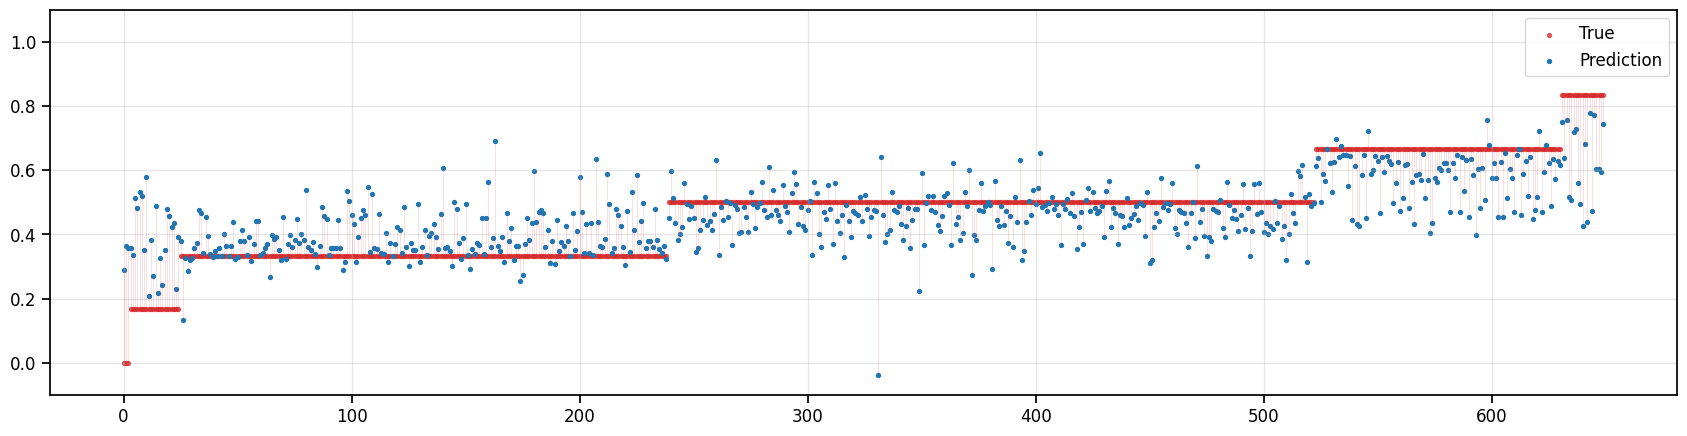

In [ ]:
# Evaluate and plot the performance of the final model on the test data
print('Final Model Test Performance')
plot_residuals(final_model, X_test.copy(), y_test.copy())

## TODO Exercise

The output of the regression problem has been scaled to be in the range [0,1].
However, the linear output of our model can also predict values outside this interval.
Try to repeat the experiment by adding a ZeroOneClipping layer as the last layer of the network.

```
class ZeroOneClipping(tfkl.Layer):
    def __init__(self, **kwargs):
        super(ZeroOneClipping, self).__init__(**kwargs)

    def call(self, inputs):
        # Clips the output between 0 and 1
        cropped_output = tf.clip_by_value(inputs, 0, 1)
        return cropped_output
```
```
...
clipping = ZeroOneClipping()(output_activation)
```


What if, instead, the output activating function changed to treat the target as a bounded probability
```
output_activation = tfkl.Activation('sigmoid', name='OutputActivation')(output_layer)
```

*Credits: Eugenio Lomurno, 📧 eugenio.lomurno@polimi.it*